# Project: 
## DrapeAura 2023 E-Commerce Analysis: Unlocking Growth Opportunities and Enhancing Financial Performance

<br>

## Table of Contents:

- [Introduction](#intro)
- [Research Questions](#Quest)
- [Analysis Objectives](#Objective)
- [Meta Data](#Meta)
- [Part I - Data Wrangling](#wrang)
- [Part II - Exploratory Data Analysis(EDA)](#EDA)
- [Part III - Advanced Aata Analysis](#Advanced)
  - [Part III.1 - OverViews](#OverViews)
  - [Part III.2 - Growth Opportunities](#Growth)
  - [Part III.3 - Shipping Costs & Profits](#ShipCost)
- [Part IIII - Key Performance Indicators (KPIs)](#KPIs)
- [Conclusions & Insights](#Concl)


<br>

<a id='intro'></a>
## Introduction:

- This study seeks to deeply analyze the **2023** e-commerce data of **"DrapeAura"**, a clothing retailer. The primary goal is to identify growth opportunities and enhance the company’s financial performance by boosting sales and minimizing costs. The analysis will center on four main pillars:

  1. **General Insights:** A comprehensive understanding of sales volume, identifying the best-selling products, knowing the items that are frequently purchased together, and calculating the profit margin for each product.
  
  2. **Growth Opportunities (Part One):** Building a market basket analysis to identify complementary and alternative products, and providing cross-selling recommendations to increase the value of orders.
  
  3. **Growth Opportunities (Part Two):** Studying the time trends of revenues, analyzing the behavior of repeat customers, and identifying the best-performing products.
  
  4. **Shipping Costs and Profits:** Analyzing shipping costs and identifying strategies to reduce them, and studying the relationship between customers' location and their purchasing patterns.


<br>

<a id='Quest'></a>
## Research Questions:
- Based on the objectives of the study, we can formulate a set of research questions that we will answer through the analysis:
<br>

 - **General Insights:**
   - What are the best-selling products in the store?
   - What are the items that customers frequently purchase together?
   - What is the average profit margin for each product?
  
 - **Growth Opportunities (Part 1):**
   - What complementary and substitute products can be sold together to increase order value?
   - What cross-selling strategies can be implemented?
  
 - **Growth Opportunities (Part 2):**
   - What are the trends in revenue and purchase volume?
   - How does repeat customer behavior change over time?
   - Which products contribute the most to revenue?
  
 - **Shipping Costs and Profit:**
   - What factors affect shipping costs?
   - How can shipping costs be reduced without impacting customer experience?
   - Is there a relationship between customer location and their purchasing patterns?


<br>

<a id='Objective'></a>
## Analysis Objectives:

- **Increase sales:** Identify high-performing products and develop targeted marketing strategies.
- **Improve profit margin:** Analyze product costs and identify opportunities to improve profitability.
- **Improve customer experience:** Provide personalized product recommendations and optimize shipping.
- **Discover new growth opportunities:** Identify new markets or new products that can be added to the portfolio.

<br>

<a id='Meta'></a>
## Meta Data:
- Below is a description of this data set:

<img src="metadata.png" alt="Alt Text" width="1000" height="1000">

<br>

#### - First of all, let's import the basic and necessary libraries .

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import datetime
%matplotlib inline
sns.set_style("white")
pd.options.display.max_columns = 30

<a id='wrang'></a>
## Part I - Data Wrangling

#### We will do the following steps:


- ### Gathering Data

**A.1 Loading the customer dataset from the `usa_customers.csv` file and displaying the top few rows for an initial overview**

In [2]:
df_customer = pd.read_csv("usa_customers.csv")
df_customer.head()

customer_id  age gender           state             city  postal_code  \
0      23896.0   35      F        New York         New York        10002   
1      81708.0   36      F  South Carolina    North Augusta        29841   
2      68390.0   12      F      New Jersey    Scotch Plains         7076   
3      82697.0   67      F         Arizona       Scottsdale        85255   
4      52107.0   16      F      California  San Luis Obispo        93401   

    latitude   longitude  
0  40.715286  -73.985885  
1  33.525169  -81.940102  
2  40.632254  -74.373364  
3  33.678461 -111.855561  
4  35.275382 -120.620128

<br>

**A.2 Loading the product dataset from the `usa_product.csv` file and displaying the top few rows for an initial overview**

In [3]:
df_product = pd.read_csv("usa_product.csv")
df_product.head()

product_id                                               name     category  \
0       13842   Low Profile Dyed Cotton Twill Cap - Navy W39S55D  Accessories   
1       13928  Low Profile Dyed Cotton Twill Cap - Putty W39S55D  Accessories   
2       14115       Enzyme Regular Solid Army Caps-Black W35S45D  Accessories   
3       14157  Enzyme Regular Solid Army Caps-Olive W35S45D (...  Accessories   
4       14273              Washed Canvas Ivy Cap - Black W11S64C  Accessories   

  brand department     cost  shipping_cost_1000_mile  retail_price  
0    MG      Women  2.51875                 0.201986          6.25  
1    MG      Women  2.33835                 0.187414          5.95  
2    MG      Women  4.87956                 0.452863         10.99  
3    MG      Women  4.64877                 0.334327         10.99  
4    MG      Women  6.50793                 0.542914         15.99

<br>

**A.3 Loading the order dataset from the `usa_order.csv` file and displaying the top few rows for an initial overview**

In [4]:
df_order= pd.read_csv("usa_order.csv")
df_order.head()

order_item_id  invoice_no  customer_id  product_id  \
0          51224       35223        28215       14235   
1         154022      106052        84693       14235   
2          51226       35223        28215       10641   
3         165382      113918        90977       10641   
4          51227       35223        28215        5268   

            transaction_date  retail_price  quantity      sales  
0  2023-12-03 13:23:00+00:00          0.02         3   0.060000  
1  2023-09-15 12:39:00+00:00          0.02         5   0.100000  
2  2023-12-03 13:23:00+00:00         16.00         2  32.000000  
3  2022-04-22 08:26:00+00:00         16.00         3  48.000000  
4  2023-12-03 13:23:00+00:00         19.99         4  79.959999

<br>

**A.4 Loading the  USA states and regions dataset from the `US_States_Regions.csv` file**

In [5]:
df_States_Region_map = pd.read_csv("US_States_Regions.csv")
df_States_Region_map.head()

state abbreviation region   latitude   longitude
0     Alabama           AL  South  32.806671  -86.791130
1      Alaska           AK   West  61.370716 -152.404419
2     Arizona           AZ   West  33.729759 -111.431221
3    Arkansas           AR  South  34.969704  -92.373123
4  California           CA   West  36.116203 -119.681564

<br>


- ### Assessing Data

<br>

**B.1 Merge Data Tables.**

In [6]:
df_product_sales = df_product.merge(
    df_order, on="product_id").merge(
    df_customer, on="customer_id").merge(
    df_States_Region_map, on="state")

df_product_sales.head()

product_id                                               name  \
0       13928  Low Profile Dyed Cotton Twill Cap - Putty W39S55D   
1        5803  LOCOMO Women Patriot Patriotic Great Britain B...   
2       10182              Floral Flannel Pajamas - Misses Sizes   
3       12882  Speedo Women's Color Block Zip Front Endurance...   
4       15918  Glamorise Women's Soft Shoulders Minimizer Bra...   

         category               brand department       cost  \
0     Accessories                  MG      Women   2.338350   
1        Leggings     LOCOMO Leggings      Women   8.739170   
2  Sleep & Lounge  Carol Wright Gifts      Women  10.075070   
3            Swim              Speedo      Women  35.035619   
4            Plus           Glamorise      Women  22.811041   

   shipping_cost_1000_mile  retail_price_x  order_item_id  invoice_no  \
0                 0.187414        5.950000         142771       98298   
1                 0.805178       14.990000         142772       98298   
2                 0.820116       16.990000         142774       98298   
3                 3.260523       79.989998         142776       98299   
4                 1.968013       45.990002         142775       98299   

   customer_id           transaction_date  retail_price_y  quantity  \
0        78444  2023-11-19 09:52:00+00:00        5.950000         4   
1        78444  2023-11-19 09:52:00+00:00       14.990000         3   
2        78444  2023-11-19 09:52:00+00:00       16.990000         2   
3        78444  2023-11-30 09:52:00+00:00       79.989998         5   
4        78444  2023-11-30 09:52:00+00:00       45.990002         4   

        sales  age gender        state    city  postal_code  latitude_x  \
0   23.799999   39      F  Mississippi  Oxford        38655   34.329453   
1   44.969999   39      F  Mississippi  Oxford        38655   34.329453   
2   33.980000   39      F  Mississippi  Oxford        38655   34.329453   
3  399.949989   39      F  Mississippi  Oxford        38655   34.329453   
4  183.960007   39      F  Mississippi  Oxford        38655   34.329453   

   longitude_x abbreviation region  latitude_y  longitude_y  
0   -89.468527           MS  South   32.741646   -89.678696  
1   -89.468527           MS  South   32.741646   -89.678696  
2   -89.468527           MS  South   32.741646   -89.678696  
3   -89.468527           MS  South   32.741646   -89.678696  
4   -89.468527           MS  South   32.741646   -89.678696

<br>


**B.2 Check the basic information of the data frame**

In [7]:
df_product_sales.shape

(28380, 26)

In [8]:
df_product_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28380 entries, 0 to 28379
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_id               28380 non-null  int64  
 1   name                     28379 non-null  object 
 2   category                 28380 non-null  object 
 3   brand                    28359 non-null  object 
 4   department               28380 non-null  object 
 5   cost                     28380 non-null  float64
 6   shipping_cost_1000_mile  28380 non-null  float64
 7   retail_price_x           28380 non-null  float64
 8   order_item_id            28380 non-null  int64  
 9   invoice_no               28380 non-null  int64  
 10  customer_id              28380 non-null  int64  
 11  transaction_date         28380 non-null  object 
 12  retail_price_y           28380 non-null  float64
 13  quantity                 28380 non-null  int64  
 14  sales                 

&#9865; **From the initial information results, the `city`, `brand`, and `product_description` columns contain null values ​​but only 1% of the data, and several columns need to be converted to `object` type.**<br><br>

&#9865; **Certain columns need to be renamed to align with their respective tables.**<br><br>

&#9865; **I have also a duplicate column for `retail_price` so we will delete it.**<br><br>

- ### Data cleaning

In [9]:
df_product_sales.columns.to_list()

['product_id',
 'name',
 'category',
 'brand',
 'department',
 'cost',
 'shipping_cost_1000_mile',
 'retail_price_x',
 'order_item_id',
 'invoice_no',
 'customer_id',
 'transaction_date',
 'retail_price_y',
 'quantity',
 'sales',
 'age',
 'gender',
 'state',
 'city',
 'postal_code',
 'latitude_x',
 'longitude_x',
 'abbreviation',
 'region',
 'latitude_y',
 'longitude_y']

<br>

**C.1 I have a duplicate column for `retail_price` so we will delete it.**

In [10]:
df_product_sales.drop(["retail_price_y"], axis=1, inplace=True)

df_product_sales.head()

product_id                                               name  \
0       13928  Low Profile Dyed Cotton Twill Cap - Putty W39S55D   
1        5803  LOCOMO Women Patriot Patriotic Great Britain B...   
2       10182              Floral Flannel Pajamas - Misses Sizes   
3       12882  Speedo Women's Color Block Zip Front Endurance...   
4       15918  Glamorise Women's Soft Shoulders Minimizer Bra...   

         category               brand department       cost  \
0     Accessories                  MG      Women   2.338350   
1        Leggings     LOCOMO Leggings      Women   8.739170   
2  Sleep & Lounge  Carol Wright Gifts      Women  10.075070   
3            Swim              Speedo      Women  35.035619   
4            Plus           Glamorise      Women  22.811041   

   shipping_cost_1000_mile  retail_price_x  order_item_id  invoice_no  \
0                 0.187414        5.950000         142771       98298   
1                 0.805178       14.990000         142772       98298   
2                 0.820116       16.990000         142774       98298   
3                 3.260523       79.989998         142776       98299   
4                 1.968013       45.990002         142775       98299   

   customer_id           transaction_date  quantity       sales  age gender  \
0        78444  2023-11-19 09:52:00+00:00         4   23.799999   39      F   
1        78444  2023-11-19 09:52:00+00:00         3   44.969999   39      F   
2        78444  2023-11-19 09:52:00+00:00         2   33.980000   39      F   
3        78444  2023-11-30 09:52:00+00:00         5  399.949989   39      F   
4        78444  2023-11-30 09:52:00+00:00         4  183.960007   39      F   

         state    city  postal_code  latitude_x  longitude_x abbreviation  \
0  Mississippi  Oxford        38655   34.329453   -89.468527           MS   
1  Mississippi  Oxford        38655   34.329453   -89.468527           MS   
2  Mississippi  Oxford        38655   34.329453   -89.468527           MS   
3  Mississippi  Oxford        38655   34.329453   -89.468527           MS   
4  Mississippi  Oxford        38655   34.329453   -89.468527           MS   

  region  latitude_y  longitude_y  
0  South   32.741646   -89.678696  
1  South   32.741646   -89.678696  
2  South   32.741646   -89.678696  
3  South   32.741646   -89.678696  
4  South   32.741646   -89.678696

<br>


**C.2 I will rename certain columns according to their respective tables**

In [11]:
col_rename = {"name":"product_description", 
              "retail_price_x":"unit_price", 
              "abbreviation":"state_ab",
             "latitude_x":"customer_latitude",
             "longitude_x":"customer_longitude",
             "latitude_y":"state_latitude",
             "longitude_y":"state_longitude"}

df_product_sales.rename(columns=col_rename, inplace=True)

df_product_sales.head()

product_id                                product_description  \
0       13928  Low Profile Dyed Cotton Twill Cap - Putty W39S55D   
1        5803  LOCOMO Women Patriot Patriotic Great Britain B...   
2       10182              Floral Flannel Pajamas - Misses Sizes   
3       12882  Speedo Women's Color Block Zip Front Endurance...   
4       15918  Glamorise Women's Soft Shoulders Minimizer Bra...   

         category               brand department       cost  \
0     Accessories                  MG      Women   2.338350   
1        Leggings     LOCOMO Leggings      Women   8.739170   
2  Sleep & Lounge  Carol Wright Gifts      Women  10.075070   
3            Swim              Speedo      Women  35.035619   
4            Plus           Glamorise      Women  22.811041   

   shipping_cost_1000_mile  unit_price  order_item_id  invoice_no  \
0                 0.187414    5.950000         142771       98298   
1                 0.805178   14.990000         142772       98298   
2                 0.820116   16.990000         142774       98298   
3                 3.260523   79.989998         142776       98299   
4                 1.968013   45.990002         142775       98299   

   customer_id           transaction_date  quantity       sales  age gender  \
0        78444  2023-11-19 09:52:00+00:00         4   23.799999   39      F   
1        78444  2023-11-19 09:52:00+00:00         3   44.969999   39      F   
2        78444  2023-11-19 09:52:00+00:00         2   33.980000   39      F   
3        78444  2023-11-30 09:52:00+00:00         5  399.949989   39      F   
4        78444  2023-11-30 09:52:00+00:00         4  183.960007   39      F   

         state    city  postal_code  customer_latitude  customer_longitude  \
0  Mississippi  Oxford        38655          34.329453          -89.468527   
1  Mississippi  Oxford        38655          34.329453          -89.468527   
2  Mississippi  Oxford        38655          34.329453          -89.468527   
3  Mississippi  Oxford        38655          34.329453          -89.468527   
4  Mississippi  Oxford        38655          34.329453          -89.468527   

  state_ab region  state_latitude  state_longitude  
0       MS  South       32.741646       -89.678696  
1       MS  South       32.741646       -89.678696  
2       MS  South       32.741646       -89.678696  
3       MS  South       32.741646       -89.678696  
4       MS  South       32.741646       -89.678696

<br>


**C.3 I will reorder the columns for easier reading and analysis.**

In [12]:
col_order = df_product_sales.iloc[0:0, np.r_[8:10, 0:5, 11, 5:8, 12:14, 10, 14:16, 18, 17, 16, 21:23, 19:21, 23:25]].columns
 
df_product_sales= df_product_sales[col_order]

df_product_sales.head()

order_item_id  invoice_no  product_id  \
0         142771       98298       13928   
1         142772       98298        5803   
2         142774       98298       10182   
3         142776       98299       12882   
4         142775       98299       15918   

                                 product_description        category  \
0  Low Profile Dyed Cotton Twill Cap - Putty W39S55D     Accessories   
1  LOCOMO Women Patriot Patriotic Great Britain B...        Leggings   
2              Floral Flannel Pajamas - Misses Sizes  Sleep & Lounge   
3  Speedo Women's Color Block Zip Front Endurance...            Swim   
4  Glamorise Women's Soft Shoulders Minimizer Bra...            Plus   

                brand department           transaction_date       cost  \
0                  MG      Women  2023-11-19 09:52:00+00:00   2.338350   
1     LOCOMO Leggings      Women  2023-11-19 09:52:00+00:00   8.739170   
2  Carol Wright Gifts      Women  2023-11-19 09:52:00+00:00  10.075070   
3              Speedo      Women  2023-11-30 09:52:00+00:00  35.035619   
4           Glamorise      Women  2023-11-30 09:52:00+00:00  22.811041   

   shipping_cost_1000_mile  unit_price  quantity       sales  customer_id  \
0                 0.187414    5.950000         4   23.799999        78444   
1                 0.805178   14.990000         3   44.969999        78444   
2                 0.820116   16.990000         2   33.980000        78444   
3                 3.260523   79.989998         5  399.949989        78444   
4                 1.968013   45.990002         4  183.960007        78444   

   age gender  postal_code    city        state state_ab region  \
0   39      F        38655  Oxford  Mississippi       MS  South   
1   39      F        38655  Oxford  Mississippi       MS  South   
2   39      F        38655  Oxford  Mississippi       MS  South   
3   39      F        38655  Oxford  Mississippi       MS  South   
4   39      F        38655  Oxford  Mississippi       MS  South   

   customer_latitude  customer_longitude  state_latitude  state_longitude  
0          34.329453          -89.468527       32.741646       -89.678696  
1          34.329453          -89.468527       32.741646       -89.678696  
2          34.329453          -89.468527       32.741646       -89.678696  
3          34.329453          -89.468527       32.741646       -89.678696  
4          34.329453          -89.468527       32.741646       -89.678696

<br>


**C.4 Identify and remove any null values or duplicate rows.**

In [13]:
df_product_sales.duplicated().sum()

0

&#9865; **No duplicate rows.**<br><br>

In [14]:
df_product_sales.isnull().sum().sort_values(ascending=False)

city                       202
brand                       21
product_description          1
order_item_id                0
age                          0
state_latitude               0
customer_longitude           0
customer_latitude            0
region                       0
state_ab                     0
state                        0
postal_code                  0
gender                       0
sales                        0
customer_id                  0
invoice_no                   0
quantity                     0
unit_price                   0
shipping_cost_1000_mile      0
cost                         0
transaction_date             0
department                   0
category                     0
product_id                   0
state_longitude              0
dtype: int64

In [15]:
df_product_sales[df_product_sales.isnull().any(axis= 1)]

order_item_id  invoice_no  product_id  \
540           165282      113847        9302   
541           165285      113848         503   
542           165283      113847        8744   
543           165286      113848         595   
544           165284      113847        6079   
...              ...         ...         ...   
27085         174116      119898       12658   
27100         167566      115425       28209   
27199         172809      118985       18570   
27252         177098      121980       27892   
27469         161370      111145       15757   

                                     product_description           category  \
540        Skidders Women's Gripper Socks - Pink Stripes    Socks & Hosiery   
541                      Neon Buddha Women's Beijing Top        Tops & Tees   
542                      Anne Klein Women's Wendy Jacket  Outerwear & Coats   
543    Lucky Brand Women's Under The Stars Thermal Shirt        Tops & Tees   
544               Woolrich Women's Holly Spring Leggings           Leggings   
...                                                  ...                ...   
27085              Fashion Forms Women's Strap Solutions          Intimates   
27100               Enjoi New Jersey Board Short - Men's               Swim   
27199                   Men's 7-Footer Sports Tube Socks             Active   
27252         Reyn Spooner Men's Pa'a Classic Swim Trunk               Swim   
27469  NEW Aluminum Credit Card Wallet - RFID Blockin...               Plus   

               brand department           transaction_date       cost  \
540         SkidDERS      Women  2023-12-06 02:54:00+00:00   3.138510   
541      Neon Buddha      Women  2023-02-11 02:54:00+00:00  35.490000   
542       Anne Klein      Women  2023-12-06 02:54:00+00:00  57.062500   
543      Lucky Brand      Women  2023-02-11 02:54:00+00:00  29.997000   
544         Woolrich      Women  2023-12-06 02:54:00+00:00  33.040000   
...              ...        ...                        ...        ...   
27085  Fashion Forms      Women  2022-08-13 04:37:00+00:00   8.336000   
27100          Enjoi        Men  2023-01-31 13:28:00+00:00  35.168001   
27199         Wigwam        Men  2023-12-16 09:10:00+00:00   2.532270   
27252   Reyn Spooner        Men  2022-08-08 15:20:00+00:00  45.000000   
27469            NaN      Women  2023-02-05 07:02:00+00:00   2.235510   

       shipping_cost_1000_mile  unit_price  quantity       sales  customer_id  \
540                   0.266433    6.990000         1    6.990000        90922   
541                   2.881121   65.000000         3  195.000000        90922   
542                   3.896770  137.500000         4  550.000000        90922   
543                   1.583148   49.500000         6  297.000000        90922   
544                   2.211480   59.000000         5  295.000000        90922   
...                        ...         ...       ...         ...          ...   
27085                 0.748141   16.000000         6   96.000000        95718   
27100                 3.311563   54.950001         1   54.950001        92204   
27199                 0.226510    5.590000         6   33.540001        95023   
27252                 3.776893   75.000000         3  225.000000        97364   
27469                 0.198599    4.210000         4   16.840000        88775   

       age gender  postal_code           city     state state_ab   region  \
540     43      F        77379            NaN     Texas       TX    South   
541     43      F        77379            NaN     Texas       TX    South   
542     43      F        77379            NaN     Texas       TX    South   
543     43      F        77379            NaN     Texas       TX    South   
544     43      F        77379            NaN     Texas       TX    South   
...    ...    ...          ...            ...       ...      ...      ...   
27085   12      F        48044            NaN  Michigan       MI  Midwest   
27100   17     

In [16]:
np.round(df_product_sales.isnull().sum()*100/len(df_product_sales),2).sort_values(ascending=False)

city                       0.71
brand                      0.07
order_item_id              0.00
customer_id                0.00
state_latitude             0.00
customer_longitude         0.00
customer_latitude          0.00
region                     0.00
state_ab                   0.00
state                      0.00
postal_code                0.00
gender                     0.00
age                        0.00
sales                      0.00
invoice_no                 0.00
quantity                   0.00
unit_price                 0.00
shipping_cost_1000_mile    0.00
cost                       0.00
transaction_date           0.00
department                 0.00
category                   0.00
product_description        0.00
product_id                 0.00
state_longitude            0.00
dtype: float64

&#9865; **As previously explained, the total number of null values does not exceed 1% of the data, so we will remove the corresponding rows**<br><br>


**C.5 Remove Null values.**

In [17]:
df_product_sales.dropna(subset="city", inplace=True)

In [18]:
df_filter_nan = df_product_sales[df_product_sales["brand"].isnull()][["product_id", "product_description", "category", "brand"]]
df_filter_nan

product_id                                product_description  \
1810        11668                              Everyday Comfort Cami   
1814        27288  White and Black Check Dot VIP Flannel Pants fo...   
5037        16559     Gildan Adult Ultra CottonTM Sleeveless T-Shirt   
5594         9482           KEEN Women Bellingham Low Ultralite Sock   
6091         9482           KEEN Women Bellingham Low Ultralite Sock   
6094        21484           True Nation Big & Tall Relaxed-Fit Jeans   
6096        23769                Stormtech Men's Chinook Fleece Vest   
8970        11843                         Wendy Glez Rose Cami Black   
10258       27288  White and Black Check Dot VIP Flannel Pants fo...   
15000       23769                Stormtech Men's Chinook Fleece Vest   
15001       27543              Harbor Bay Big & Tall Swim Rash Guard   
16399       13863                      Husky Animal Hat with Mittens   
16721       13863                      Husky Animal Hat with Mittens   
16723       15757  NEW Aluminum Credit Card Wallet - RFID Blockin...   
16727       27288  White and Black Check Dot VIP Flannel Pants fo...   
18771       24287     Adidas Men's Hiking Hooded 1Side Fleece Jacket   
19835       16309         Hurley Men's One and Only Short Sleeve Tee   
20323       25187                      SockGuy Men's Kokopelli Socks   
24971       13863                      Husky Animal Hat with Mittens   
25085       25135                          Volcom Men's Argyle Socks   
27469       15757  NEW Aluminum Credit Card Wallet - RFID Blockin...   

                category brand  
1810           Intimates   NaN  
1814      Sleep & Lounge   NaN  
5037         Tops & Tees   NaN  
5594     Socks & Hosiery   NaN  
6091     Socks & Hosiery   NaN  
6094               Jeans   NaN  
6096   Outerwear & Coats   NaN  
8970           Intimates   NaN  
10258     Sleep & Lounge   NaN  
15000  Outerwear & Coats   NaN  
15001               Swim   NaN  
16399        Accessories   NaN  
16721        Accessories   NaN  
16723               Plus   NaN  
16727     Sleep & Lounge   NaN  
18771  Outerwear & Coats   NaN  
19835        Tops & Tees   NaN  
20323              Socks   NaN  
24971        Accessories   NaN  
25085              Socks   NaN  
27469               Plus   NaN

In [19]:
df_product_sales[df_product_sales["product_id"].isin(df_filter_nan["product_id"])]

order_item_id  invoice_no  product_id  \
1810          118907       81898       11668   
1814          118259       81449       27288   
5037          163987      112946       16559   
5594          173387      119374        9482   
6091           33571       23127        9482   
6094          159206      109637       21484   
6096            6173        4288       23769   
8970           99531       68506       11843   
10258         148139      102007       27288   
15000          36528       25152       23769   
15001         120447       82935       27543   
16399          85961       59129       13863   
16721         159062      109532       13863   
16723          49988       34379       15757   
16727          69566       47844       27288   
18771          56180       38664       24287   
19835          20476       14181       16309   
20323          17084       11821       25187   
24971         100027       68865       13863   
25085          43842       30174       25135   
27469         161370      111145       15757   

                                     product_description           category  \
1810                               Everyday Comfort Cami          Intimates   
1814   White and Black Check Dot VIP Flannel Pants fo...     Sleep & Lounge   
5037      Gildan Adult Ultra CottonTM Sleeveless T-Shirt        Tops & Tees   
5594            KEEN Women Bellingham Low Ultralite Sock    Socks & Hosiery   
6091            KEEN Women Bellingham Low Ultralite Sock    Socks & Hosiery   
6094            True Nation Big & Tall Relaxed-Fit Jeans              Jeans   
6096                 Stormtech Men's Chinook Fleece Vest  Outerwear & Coats   
8970                          Wendy Glez Rose Cami Black          Intimates   
10258  White and Black Check Dot VIP Flannel Pants fo...     Sleep & Lounge   
15000                Stormtech Men's Chinook Fleece Vest  Outerwear & Coats   
15001              Harbor Bay Big & Tall Swim Rash Guard               Swim   
16399                      Husky Animal Hat with Mittens        Accessories   
16721                      Husky Animal Hat with Mittens        Accessories   
16723  NEW Aluminum Credit Card Wallet - RFID Blockin...               Plus   
16727  White and Black Check Dot VIP Flannel Pants fo...     Sleep & Lounge   
18771     Adidas Men's Hiking Hooded 1Side Fleece Jacket  Outerwear & Coats   
19835         Hurley Men's One and Only Short Sleeve Tee        Tops & Tees   
20323                      SockGuy Men's Kokopelli Socks              Socks   
24971                      Husky Animal Hat with Mittens        Accessories   
25085                          Volcom Men's Argyle Socks              Socks   
27469  NEW Aluminum Credit Card Wallet - RFID Blockin...               Plus   

      brand department           transaction_date       cost  \
1810    NaN      Women  2022-12-14 07:22:00+00:00  18.662401   
1814    NaN        Men  2023-03-03 14:47:00+00:00  12.726610   
5037    NaN        Men  2023-09-01 17:34:00+00:00  14.944250   
5594    NaN      Women  2022-08-27 03:31:00+00:00   5.712000   
6091    NaN      Women  2023-10-09 11:04:00+00:00   5.712000   
6094    NaN        Men  2023-07-15 13:42:00+00:00  30.285500   
6096    NaN        Men  2023-01-07 02:00:00+00:00  18.540000   
8970    NaN      Women  2022-05-02 15:36:00+00:00  33.900000   
10258   NaN        Men  2022-05-23 13:18:00+00:00  12.726610   
15000   NaN        Men  2023-08-11 18:37:00+00:00  18.540000   
15001   NaN        Men  2023-07-21 14:42:00+00:00  19.872000   
16399   NaN      Women  2023-09-05 18:20:00+00:00   9.554500   
16721   NaN      Women  2023-11-08 13:14:00+00:00   9.554500   
16723   NaN      Women  2022-06-12 07:28:00+00:00   2.235510   
16727   NaN        Men  2022-01-14 05:06:00+00:00  12.726610   
18771   NaN        Men  2023-10-01 12:25:00+00:00  39.488049   
19835   NaN        Men  2023-08-27 15:58:00+00:00  11.520000   
20323   NaN        Men  2023-01-26 15:04:00+00:00  14.42500

In [20]:
df_product_sales.dropna(inplace=True)

df_product_sales.isnull().sum().sum()

0

<br>


**C.6 Convert the transaction date column to datetime format.**

In [21]:
df_product_sales["transaction_date"] = pd.to_datetime(df_product_sales["transaction_date"])

<br>


**C.7 Convert the columns for IDs, invoice numbers, and postal codes to `object` type because they are categorical values, not numeric values.**

In [22]:
col =["order_item_id", "invoice_no", "product_id", "customer_id", "postal_code"]

df_product_sales[col] = df_product_sales[col].astype('object')

<br>


**C.8 Round the values in numeric columns to two decimal places**

In [23]:
col_float = ["cost", "shipping_cost_1000_mile", "unit_price", "sales"]

df_product_sales[col_float] = df_product_sales[col_float].round(2)

df_product_sales.head()

order_item_id invoice_no product_id  \
0        142771      98298      13928   
1        142772      98298       5803   
2        142774      98298      10182   
3        142776      98299      12882   
4        142775      98299      15918   

                                 product_description        category  \
0  Low Profile Dyed Cotton Twill Cap - Putty W39S55D     Accessories   
1  LOCOMO Women Patriot Patriotic Great Britain B...        Leggings   
2              Floral Flannel Pajamas - Misses Sizes  Sleep & Lounge   
3  Speedo Women's Color Block Zip Front Endurance...            Swim   
4  Glamorise Women's Soft Shoulders Minimizer Bra...            Plus   

                brand department          transaction_date   cost  \
0                  MG      Women 2023-11-19 09:52:00+00:00   2.34   
1     LOCOMO Leggings      Women 2023-11-19 09:52:00+00:00   8.74   
2  Carol Wright Gifts      Women 2023-11-19 09:52:00+00:00  10.08   
3              Speedo      Women 2023-11-30 09:52:00+00:00  35.04   
4           Glamorise      Women 2023-11-30 09:52:00+00:00  22.81   

   shipping_cost_1000_mile  unit_price  quantity   sales customer_id  age  \
0                     0.19        5.95         4   23.80       78444   39   
1                     0.81       14.99         3   44.97       78444   39   
2                     0.82       16.99         2   33.98       78444   39   
3                     3.26       79.99         5  399.95       78444   39   
4                     1.97       45.99         4  183.96       78444   39   

  gender postal_code    city        state state_ab region  customer_latitude  \
0      F       38655  Oxford  Mississippi       MS  South          34.329453   
1      F       38655  Oxford  Mississippi       MS  South          34.329453   
2      F       38655  Oxford  Mississippi       MS  South          34.329453   
3      F       38655  Oxford  Mississippi       MS  South          34.329453   
4      F       38655  Oxford  Mississippi       MS  South          34.329453   

   customer_longitude  state_latitude  state_longitude  
0          -89.468527       32.741646       -89.678696  
1          -89.468527       32.741646       -89.678696  
2          -89.468527       32.741646       -89.678696  
3          -89.468527       32.741646       -89.678696  
4          -89.468527       32.741646       -89.678696

In [24]:
df_product_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28156 entries, 0 to 28379
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   order_item_id            28156 non-null  object             
 1   invoice_no               28156 non-null  object             
 2   product_id               28156 non-null  object             
 3   product_description      28156 non-null  object             
 4   category                 28156 non-null  object             
 5   brand                    28156 non-null  object             
 6   department               28156 non-null  object             
 7   transaction_date         28156 non-null  datetime64[ns, UTC]
 8   cost                     28156 non-null  float64            
 9   shipping_cost_1000_mile  28156 non-null  float64            
 10  unit_price               28156 non-null  float64            
 11  quantity                 281

&#9865; **There are no longer any Null values ​​or duplicate columns and rows, and we have successfully completed the cleanup of the merged `df_product_sales` dataset.**<br><br>

=======================================================================================================================

<br>


<a id='EDA'></a>
## Part II - Exploratory Data Analysis(EDA)

<br>

**A.1 Limit the dataset to 2023 only.**

In [25]:
print(df_product_sales["transaction_date"].min(), df_product_sales["transaction_date"].max())

2022-01-01 03:00:00+00:00 2023-12-31 18:48:00+00:00


In [26]:
df_product_sales23 = df_product_sales[df_product_sales["transaction_date"] >= '2023-01-01']

df_product_sales23.head()

order_item_id invoice_no product_id  \
0        142771      98298      13928   
1        142772      98298       5803   
2        142774      98298      10182   
3        142776      98299      12882   
4        142775      98299      15918   

                                 product_description        category  \
0  Low Profile Dyed Cotton Twill Cap - Putty W39S55D     Accessories   
1  LOCOMO Women Patriot Patriotic Great Britain B...        Leggings   
2              Floral Flannel Pajamas - Misses Sizes  Sleep & Lounge   
3  Speedo Women's Color Block Zip Front Endurance...            Swim   
4  Glamorise Women's Soft Shoulders Minimizer Bra...            Plus   

                brand department          transaction_date   cost  \
0                  MG      Women 2023-11-19 09:52:00+00:00   2.34   
1     LOCOMO Leggings      Women 2023-11-19 09:52:00+00:00   8.74   
2  Carol Wright Gifts      Women 2023-11-19 09:52:00+00:00  10.08   
3              Speedo      Women 2023-11-30 09:52:00+00:00  35.04   
4           Glamorise      Women 2023-11-30 09:52:00+00:00  22.81   

   shipping_cost_1000_mile  unit_price  quantity   sales customer_id  age  \
0                     0.19        5.95         4   23.80       78444   39   
1                     0.81       14.99         3   44.97       78444   39   
2                     0.82       16.99         2   33.98       78444   39   
3                     3.26       79.99         5  399.95       78444   39   
4                     1.97       45.99         4  183.96       78444   39   

  gender postal_code    city        state state_ab region  customer_latitude  \
0      F       38655  Oxford  Mississippi       MS  South          34.329453   
1      F       38655  Oxford  Mississippi       MS  South          34.329453   
2      F       38655  Oxford  Mississippi       MS  South          34.329453   
3      F       38655  Oxford  Mississippi       MS  South          34.329453   
4      F       38655  Oxford  Mississippi       MS  South          34.329453   

   customer_longitude  state_latitude  state_longitude  
0          -89.468527       32.741646       -89.678696  
1          -89.468527       32.741646       -89.678696  
2          -89.468527       32.741646       -89.678696  
3          -89.468527       32.741646       -89.678696  
4          -89.468527       32.741646       -89.678696

In [27]:
df_product_sales23.shape

(18819, 25)

In [28]:
num_desc= df_product_sales23.describe().T.round(2)
num_desc

count    mean     std     min     25%     50%  \
cost                     18819.0   28.64   30.93    0.99   11.32   19.78   
shipping_cost_1000_mile  18819.0    2.16    2.44    0.06    0.82    1.45   
unit_price               18819.0   59.48   65.83    2.50   24.30   39.99   
quantity                 18819.0    3.44    1.83    1.00    2.00    3.00   
sales                    18819.0  196.38  254.44    2.50   59.97  120.00   
age                      18819.0   41.11   17.05   12.00   26.00   41.00   
customer_latitude        18819.0   36.74    5.29   19.72   33.40   36.82   
customer_longitude       18819.0  -94.49   17.10 -158.09 -111.88  -88.36   
state_latitude           18819.0   36.97    5.11   21.09   33.73   36.12   
state_longitude          18819.0  -94.75   17.03 -157.50 -111.43  -88.99   

                            75%      max  
cost                      34.44   537.29  
shipping_cost_1000_mile    2.61    49.34  
unit_price                69.95   990.00  
quantity                   5.00     8.00  
sales                    236.00  6321.00  
age                       56.00    70.00  
customer_latitude         40.73    64.87  
customer_longitude       -80.60   -68.85  
state_latitude            40.39    61.37  
state_longitude          -81.69   -69.38

&#9865; **Based on the initial descriptive analysis, the numerical columns `cost`, `shipping_cost_1000_mile`, `unit_price`, and `sales` exhibit a highly skewed distribution and appear to have numerous outliers.**<br><br>

<br>

**A.2 Check the distribution of numerical columns.**

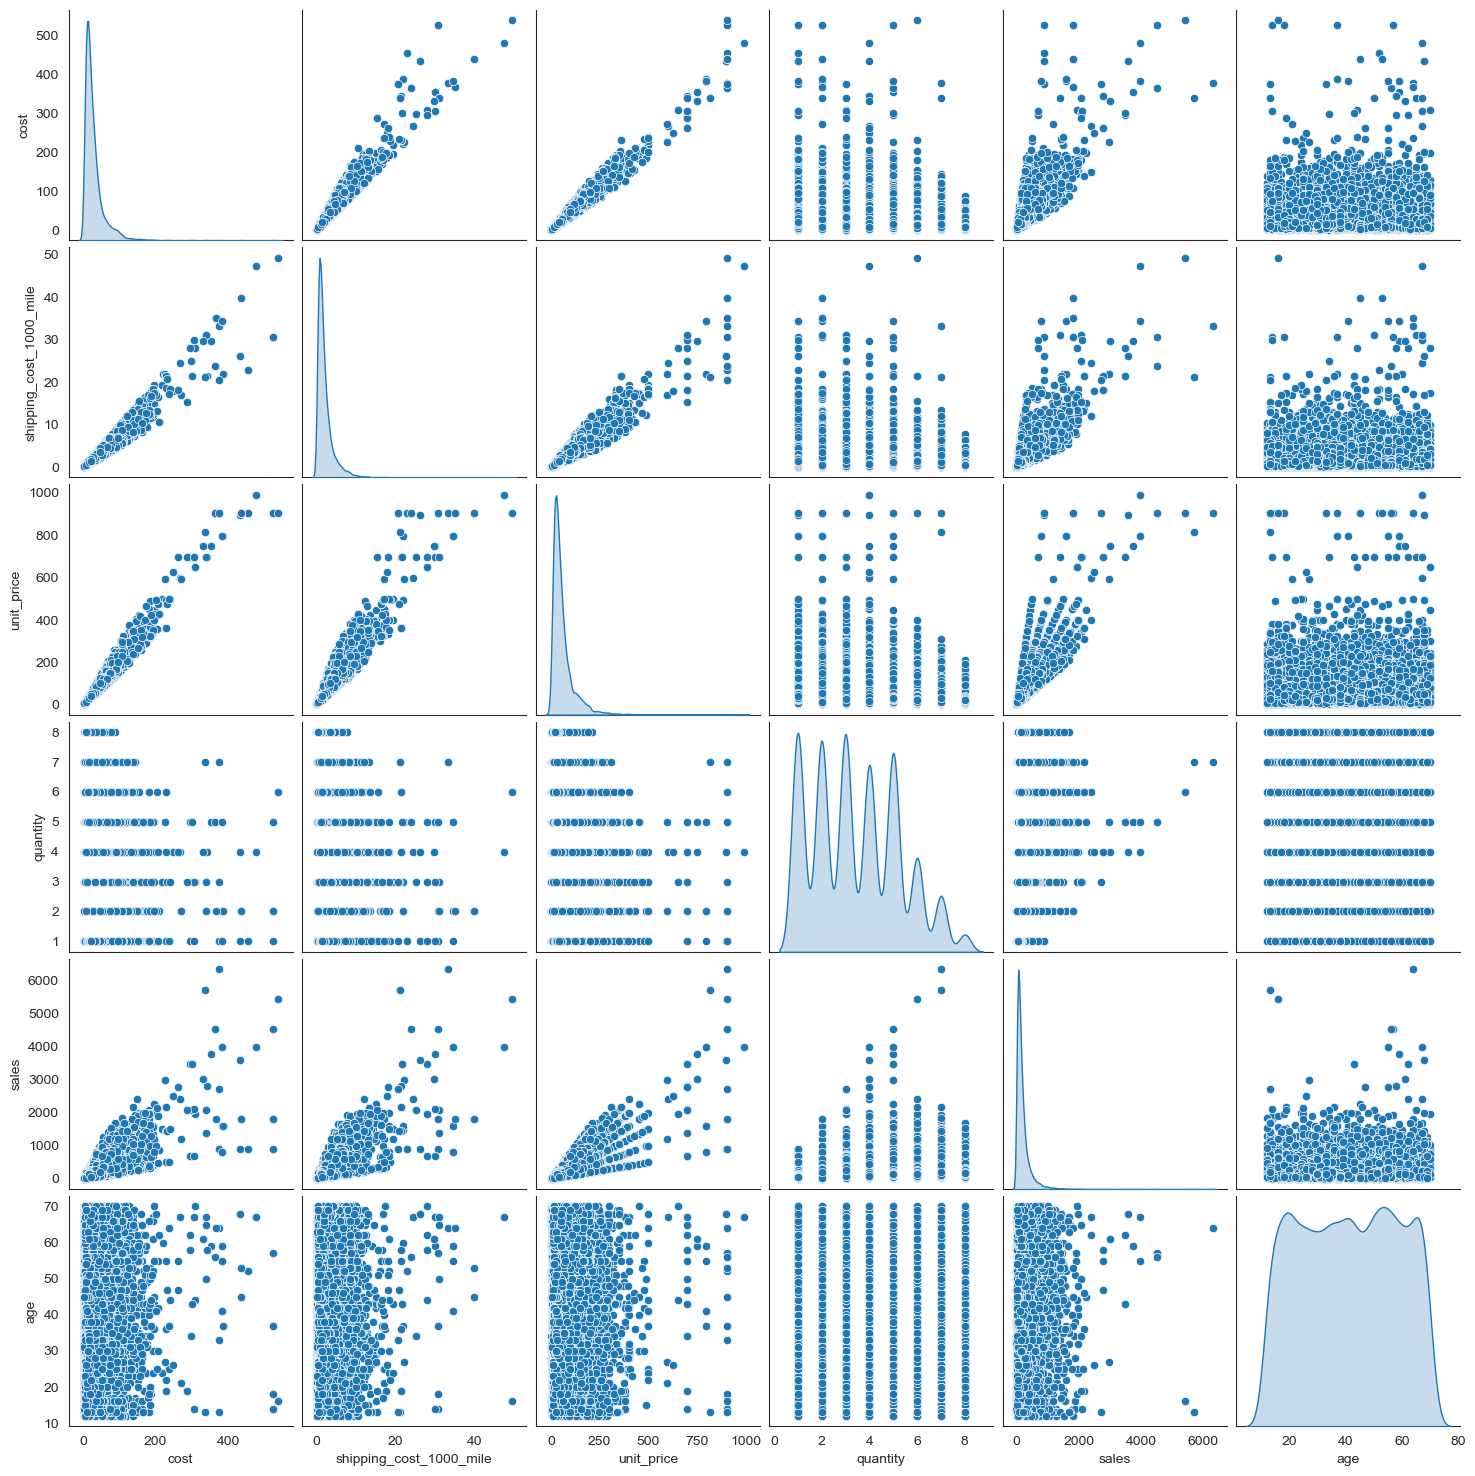

In [29]:
sns.pairplot(df_product_sales23[num_desc.index[0:6]], diag_kind= 'kde');

&#9865; **The distribution of the columns mentioned above is heavily skewed to the right.**<br><br>

<br>

**A.3 Check the distribution of values ​​in numeric columns**

In [30]:
def stand_boxplot_dist(df, col1, col2, col3, outliers=True):
    
    cols =[col1, col2, col3]
    
    fig, ax = plt.subplots(1,3, figsize=(16,5), sharex=False)
    
    for index, col in enumerate(cols):
        
        df[col].plot.box(
                        showfliers=outliers,
                        grid=True,
                        ax =ax[index])
        
    plt.show()

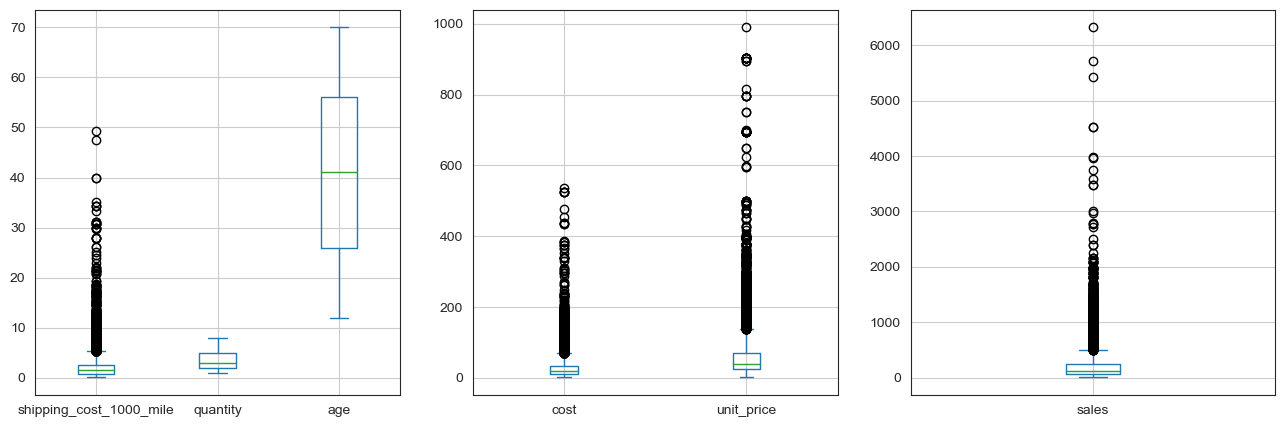

In [31]:
col1 = ["shipping_cost_1000_mile", "quantity", "age"]
col2 = ["cost", "unit_price"]

stand_boxplot_dist(df_product_sales23, col1, col2, "sales", outliers=True)

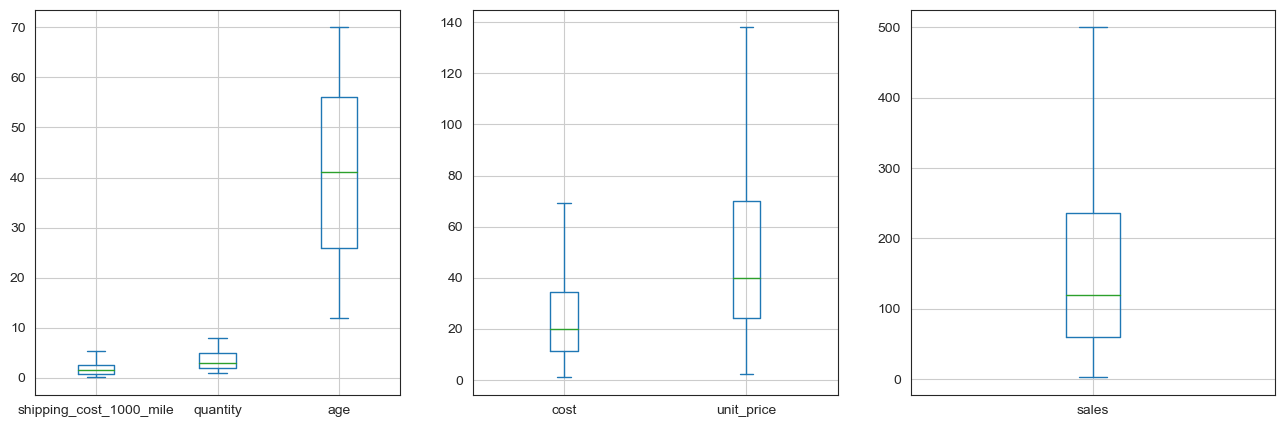

In [32]:
stand_boxplot_dist(df_product_sales23, col1, col2, "sales",outliers=False)

&#9865; **The skewed columns exhibit a significant number of outliers in the upper tail of the distribution, which can inflate the range of the data and potentially impact the accuracy of statistical measures.**<br><br>

<br>

**A.4 Check the percentage of outliers in a data set**

In [33]:
def outlier(dfs, column, how = "default"):
    
    from scipy.stats import iqr
    
    col_iqr = iqr(dfs[column])
    
    if how == 'default':
        lower_threshold= np.quantile(dfs[column], 0.25) - 1.5 * col_iqr
        upper_threshold= np.quantile(dfs[column], 0.25) + 1.5 * col_iqr
        df_col = dfs[(dfs[column] < lower_threshold) | (dfs[column] > upper_threshold)][column]
        
        if df_col.count() == 0:
            return lower_threshold, upper_threshold, df_col.count();
        else:
            return lower_threshold, upper_threshold, df_col;
        
    
    elif how == 'lower':
        lower_threshold= np.quantile(dfs[column], 0.25) - 1.5 * col_iqr
        df_col = dfs[dfs[column] < lower_threshold][column]
        
        if df_col.count() == 0:
            return lower_threshold, df_col.count();
        else:
            return lower_threshold, df_col;

    
    else:
        upper_threshold= np.quantile(dfs[column], 0.25) + 1.5 * col_iqr
        df_col = dfs[dfs[column] > upper_threshold][column]
        
        if df_col.count() == 0:
            return upper_threshold, df_col.count();
        else:
            return upper_threshold, df_col;
    


In [34]:
lower_cost, upper_cost, df_cost = outlier(df_product_sales23, "cost")

print(lower_cost, upper_cost)

-23.3675 46.0075


In [35]:
df_cost.sort_values()

21325     46.03
11408     46.04
268       46.05
27559     46.07
2714      46.08
          ...  
17718    524.64
10806    524.64
67       524.64
16869    524.64
26274    537.29
Name: cost, Length: 2944, dtype: float64

In [36]:
np.round(df_cost.shape[0] / df_product_sales23.shape[0] * 100, 2)

15.64

In [37]:
lower_ship, upper_ship, df_ship = outlier(df_product_sales23, "shipping_cost_1000_mile")

print(lower_ship, upper_ship)

-1.8524999999999998 3.5024999999999995


In [38]:
df_ship.sort_values()

449       3.51
8961      3.51
9764      3.51
7756      3.51
6914      3.51
         ...  
15790    35.05
24176    39.89
21753    39.89
19737    47.44
26274    49.34
Name: shipping_cost_1000_mile, Length: 2945, dtype: float64

In [39]:
np.round(df_ship.shape[0] / df_product_sales23.shape[0] * 100, 2)

15.65

In [40]:
lower_price, upper_price, df_price = outlier(df_product_sales23, "unit_price")

print(lower_price, upper_price)

-44.17500000000001 92.775


In [41]:
df_price.sort_values()

19469     92.95
20377     93.00
8031      93.00
28222     93.00
3315      93.00
          ...  
2683     903.00
177      903.00
21753    903.00
67       903.00
19737    990.00
Name: unit_price, Length: 3102, dtype: float64

In [42]:
np.round(df_price.shape[0] / df_product_sales23.shape[0] * 100, 2)

16.48

In [43]:
lower_sales, upper_sales, df_sales = outlier(df_product_sales23, "sales")

print(lower_sales, upper_sales)

-204.07500000000002 324.015


In [44]:
df_sales.sort_values()

18373     324.75
10219     324.75
14108     324.75
4701      324.75
12700     324.75
          ...   
10806    4515.00
23764    4515.00
26274    5418.00
14109    5705.00
1741     6321.00
Name: sales, Length: 2952, dtype: float64

In [45]:
np.round(df_sales.shape[0] / df_product_sales23.shape[0] * 100, 2)

15.69

&#9865; **More than 15% of the data points in the skewed columns are outliers. This significant proportion necessitates careful consideration and appropriate handling.**<br><br>

<br>


- ### Explore Customer Numbers

<br>

**B.1 Total Number of Customers**

In [46]:
print(f"Total Number of Customers: {df_product_sales23.customer_id.nunique()}")

Total Number of Customers: 9893


&#9865; **The total number of customers (9893) is a good sample size to analyze the data and draw conclusions with reasonable accuracy.**<br><br>

<br>

**B.2 Number of Customers Per State**

In [47]:
def dist_map(df, Location, color_scale, bar_values, bar_title, Title):
    
    fig = go.Figure(data=go.Choropleth(
    locations=df[Location],
    z=df[bar_values],
    locationmode='USA-states',
    colorscale=color_scale,
    colorbar_title=bar_title
    ))


    # Add Text (Number of Customers) Using Scattergeo
    fig.add_trace(go.Scattergeo(
        locationmode='USA-states',
        lon=df['longitude'], 
        lat=df['latitude'],  
        text=df['Text'], 
        mode='text', 
        textfont=dict(
            size=12,
            color='black',
            family='Arial'
        )
    ))

    # Customize the map
    fig.update_layout(
        title={
            'text': Title,
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top',
            'font': {'size': 22, 'color': 'blue'}
        },
        geo_scope='usa'  # Show US only
    )

    fig.show()

In [48]:
cust_num_by_stat = df_product_sales23.groupby(by='state_ab')['customer_id'].nunique()

data = {
    'state': cust_num_by_stat.keys(),
    'customers': cust_num_by_stat.values,
    'latitude': df_States_Region_map.sort_values("abbreviation")["latitude"],
    'longitude': df_States_Region_map.sort_values("abbreviation")["longitude"]
}

df_cust_stat = pd.DataFrame(data)

# Setting up texts to display state name and number of customers
df_cust_stat['Text'] = df_cust_stat['state'].astype(str) + "<br>" + df_cust_stat['customers'].astype(str)


dist_map(
    df=df_cust_stat, 
    Location='state',
    color_scale='blues',
    bar_values='customers', 
    bar_title='Number of Customers', 
    Title='Distribution of Customers by State 2023')

&#9865; **The customer base reveals a stark geographical concentration, with California (1,610 customers), Texas (1,083), and New York (616) emerging as the top three states by customer volume. These three states alone account for nearly 46% of the total customer base.**

&#9865; **In contrast, states like Vermont (4 customers), West Virginia (11), and New Hampshire (13) represent the lowest customer presence, suggesting significant market penetration challenges or opportunities for strategic expansion.** 

&#9865; **The distribution highlights the importance of focusing marketing and expansion efforts on high-potential states while developing targeted strategies to increase customer acquisition in low-volume regions.** 

&#9865; **The wide disparity between top and bottom states (ranging from 4 to 1,610 customers) indicates a need for localized marketing approaches and potential geographic market development strategies.**

<br>

**B.3 Number of Customers By Gender**

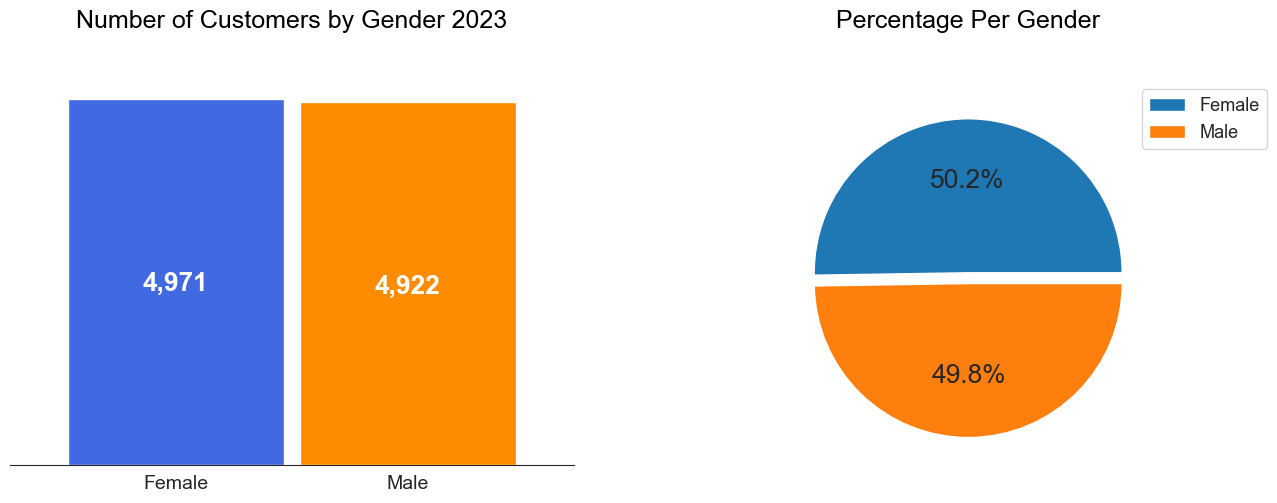

In [49]:
fig, ax = plt.subplots(1,2, figsize=(16,5), sharex=False)
c = sns.color_palette(["royalblue", "darkorange"], 2)


cust_by_gend= df_product_sales23.groupby(by='gender')['customer_id'].nunique()


cust_by_gend.plot(kind="bar",
                    rot = 0,
                    width = 0.93,
                    alpha = 1,
                    fontsize = 12,
                    color=c, ax=ax[0])

for i, g in enumerate(cust_by_gend):
    ax[0].text(i, g - 2500, "{:0,.0f}".format(g), color='white',
               fontsize=19, fontweight="bold", ha="center", va='center')
    

ax[0].set_title("Number of Customers by Gender 2023", fontsize=18, color="k", pad=38)
ax[0].set_xlabel('')
ax[0].set_xticklabels( labels=["Female", "Male"], fontsize=14)
ax[0].set_yticks([])
sns.despine(left=True);



ax[1].pie(cust_by_gend, autopct='%1.1f%%', textprops={'fontsize': 19},explode = (0, 0.07))
ax[1].set_title("Percentage Per Gender",fontsize=18, pad=38, color="k")
ax[1].legend(fontsize=13, labels=[ "Female","Male"],bbox_to_anchor=(1.3, 1));

&#9865; **There is a rough balance between the number of males and females in the customer base, with each gender accounting for about 50% of the total customers. This indicates that the products generally appeal to both genders equally..**<br><br>

<br>

**B.4 Number of Customers By Gender Per State**

In [50]:
df_cust_gend = df_product_sales23.groupby(by=['state','gender'])['customer_id'].nunique().reset_index()
df_cust_gend = df_cust_gend.merge(df_States_Region_map, on="state")

In [51]:
df_cust_gend= df_cust_gend.drop(["state", "region"], axis=1)
df_cust_gend= df_cust_gend.rename(columns={"customer_id": "customer", "abbreviation":"state"})
df_cust_gend

gender  customer state   latitude   longitude
0       F        33    AL  32.806671  -86.791130
1       M        46    AL  32.806671  -86.791130
2       F        11    AK  61.370716 -152.404419
3       M         6    AK  61.370716 -152.404419
4       F       174    AZ  33.729759 -111.431221
..    ...       ...   ...        ...         ...
95      M         3    WV  38.491226  -80.954456
96      F        66    WI  44.268543  -89.616508
97      M        55    WI  44.268543  -89.616508
98      F         6    WY  42.755966 -107.302490
99      M         9    WY  42.755966 -107.302490

[100 rows x 5 columns]

In [52]:
# Setting up texts to display state name and number of customers
df_male = df_cust_gend[df_cust_gend['gender'] == 'M']
df_female = df_cust_gend[df_cust_gend['gender'] == 'F']

df_merge =  df_male.merge(df_female, on=["state", "latitude", "longitude"], suffixes=["_m", "_f"])

df_merge['total_customer'] = df_merge['customer_m'] + df_merge['customer_f']

df_merge['Text'] = "M: " + df_merge['customer_m'].astype(str) + "<br>F: " + df_merge['customer_f'].astype(str)

In [53]:
dist_map(
    df=df_merge, 
    Location='state',
    color_scale='greens',
    bar_values='total_customer', 
    bar_title='Total of Customers(M&F)', 
    Title='Distribution of Male and Female Customers by State 2023')

&#9865; **California (CA) stands out as the state with the highest number of males (771) and females (839). This distribution indicates a relative concentration of customers in this state compared to other states.**

<br>


<a id='Advanced'></a>
# Part III - Advanced Data Analysis

<br>

<a id='OverViews'></a>
- ## Part III.1 - OverViews

<br>


- - ### Analysis of Quantity Patterns

<br>

**A.1 Total Quantity Per Product**

In [54]:
def barh_chart(df, barh_color, barh_title, barh_xlabel, barh_ylabel):
    ax = df.sort_values().plot(
    kind="barh",
    color=barh_color,
    grid=True,
    figsize=(8, 7),
    )
    
    # Add values on top of each bar
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{width:.2f}', (x + width + 0.02, y + height / 2), ha='left', va='center', fontsize=11)


    ax.set_title(barh_title, fontsize=16)
    ax.set_xlabel(barh_xlabel, fontsize=12)
    ax.set_ylabel( barh_ylabel, fontsize=12);

In [55]:
quantity_by_product=(
        df_product_sales23.groupby(by="product_description")["quantity"]
        .sum()
        .sort_values(ascending=False)
        .head(20)
)

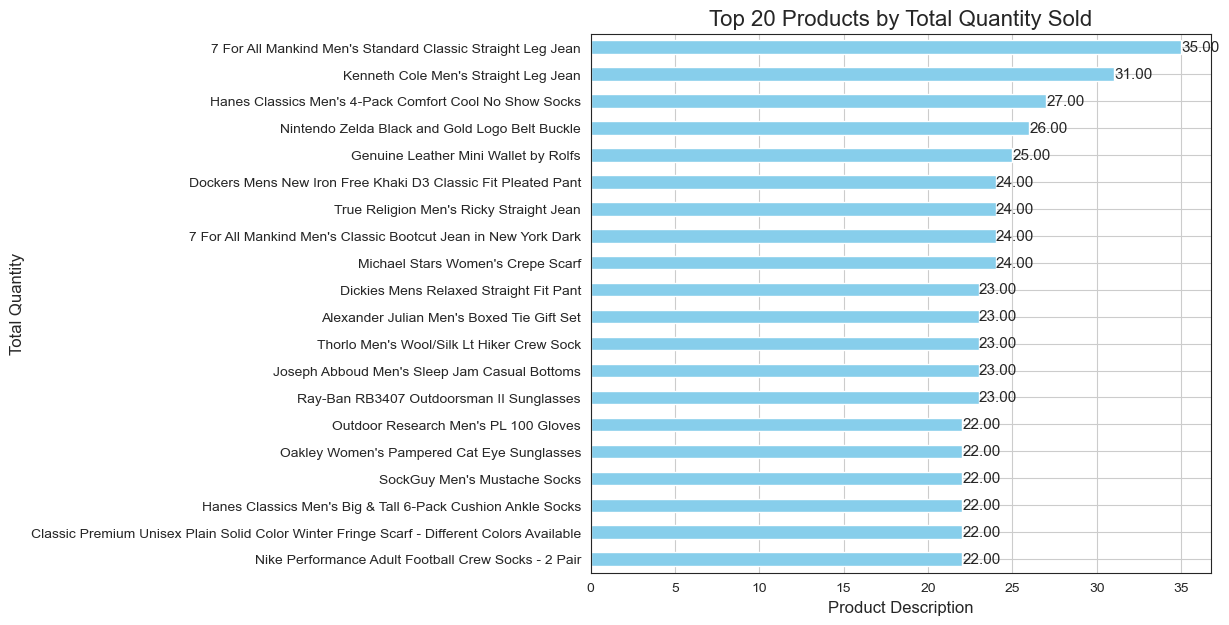

In [56]:
barh_chart(
    df=quantity_by_product, 
    barh_color="skyblue", 
    barh_title="Top 20 Products by Total Quantity Sold", 
    barh_xlabel="Product Description", 
    barh_ylabel="Total Quantity")

**1. Market Composition:**
- Significant product diversity: from men's clothing to accessories
- Broad market coverage: men's fashion, accessories, sports, style items

**2. Product Patterns:**
- Dominance of men's fashion items (jeans and pants)
- Clear focus on classic and formal wear
- Variety of brands: 7 For All Mankind, Kenneth Cole, Hanes, Nike

**3. Potential Strategies:**
- Focus on top-selling products like 7 For All Mankind jeans
- Explore opportunities to increase women's product diversity
- Pay attention to accessories as additional sales channels

**4. Marketing Insights:**
- Well-known brands enjoy higher popularity
- Practical and classic products sell best
- Evident interest in complementary items like socks and scarves

<br>

**A.2 Total Quantity Per Category**

In [57]:
def bar_chart(df, bar_color, bar_title, bar_xlabel, bar_ylabel, ):
    ax = df.plot(
    kind="bar",
    color=bar_color,
    grid=True,
    figsize=(10, 5),
    )
    
    # Add values on top of each bar
    for p in ax.patches:
        height = p.get_height()
        x = p.get_x() + p.get_width() / 2
        y = height + 0.1  # Adjust the vertical offset as needed
        ax.annotate(f'{height:,.1f}', (x, y), ha='center', rotation=90)

    ax.set_title(bar_title, fontsize=16)
    ax.set_xlabel(bar_xlabel, fontsize=12)
    ax.set_ylabel( bar_ylabel, fontsize=12);

In [58]:
quantity_by_category=(
        df_product_sales23.groupby(by="category")["quantity"]
        .sum()
        .sort_values(ascending=False)
)

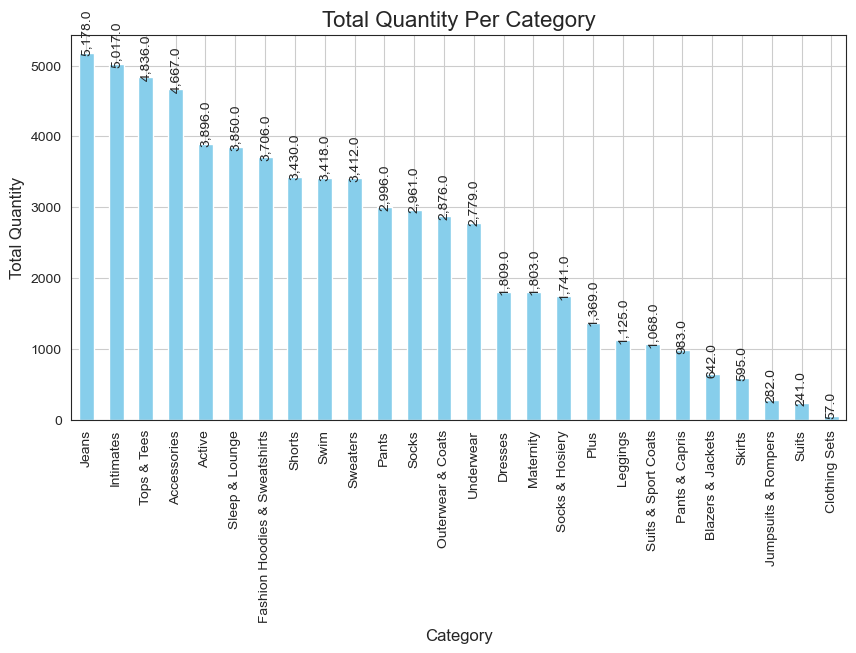

In [59]:
bar_chart(
    df=quantity_by_category, 
    bar_color="skyblue", 
    bar_title="Total Quantity Per Category", 
    bar_xlabel="Category", 
    bar_ylabel="Total Quantity")

**Top 5 Categories:**
1. Jeans: 5,178 units
2. Intimates: 5,017 units
3. Tops & Tees: 4,836 units
4. Accessories: 4,667 units
5. Active Wear: 3,896 units

**Key Insights:**<br>

**1. Category Distribution:**
- Strong performance in clothing basics (Jeans, Tops, Intimates)
- Diverse product range spanning 26 different categories
- Significant variety in clothing types

**2. Sales Concentration:**
- Top 5 categories account for approximately 46% of total quantity
- High-volume categories are everyday wear items
- Clear consumer preference for comfortable, versatile clothing

**3. Product Strategy Observations:**
- Jeans remain the top-selling category
- Intimate apparel shows strong market demand
- Accessories play a significant role in product mix
- Seasonal categories like Swim and Outerwear have moderate sales

**4. Potential Business Strategies:**
- Maintain focus on core categories (Jeans, Tops, Intimates)
- Investigate opportunities in lower-volume categories
- Consider expanding successful categories
- Develop marketing strategies for niche categories like Maternity and Suits

**Lowest Volume Categories:**
- Clothing Sets: 57 units
- Suits: 241 units
- Jumpsuits & Rompers: 282 units


<br>


**A.3 Average Quantity Per Category**

In [60]:
quantity_by_category_avg=(
        df_product_sales23.groupby(by="category")["quantity"]
        .mean()
        .sort_values(ascending=False).round(1)
)

In [61]:
bar_chart(
    df=quantity_by_category_avg, 
    bar_color="skyblue", 
    bar_title="Averge Quantity Per Category", 
    bar_xlabel="Category", 
    bar_ylabel="Avg. Quantity")

**Key Insights:**<br>

**1. Quantity Distribution:**
- Accessories and socks have the highest average per transaction
- Most categories average between 3-4 units per sale
- Consistent purchasing patterns across different clothing types

**2. Performance Observations:**
- Lowest average quantities: Suits, Blazers & Jackets, Suits & Sport Coats (2.0 units)
- Mid-range categories: Fashion items like Dresses, Sweaters, Shorts (3.0 units)
- Core clothing categories maintain solid average quantities

**3. Strategic Implications:**
- Accessories and socks are frequently bought in slightly larger quantities
- Customers tend to purchase multiple items in basic categories
- Formal wear (suits) shows lower average purchase quantities

**4. Sales Strategy Recommendations:**
- Promote bundle deals for categories with lower average quantities
- Focus marketing on high-volume, low-average categories
- Investigate why certain categories have lower average purchases

<br>

**Comparative Insight:**<br>

&#9865;**When compared to the previous total quantity data, this reveals nuanced purchasing behaviors. While some categories had high total quantities, their average per transaction varies significantly.**

<br>

&#9865;**In my analytical opinion, the focus should be on total quantities for each category more than average quantities, for the following reasons:**<br>

**1. Strategic value:**
- Total quantities give a clearer picture of actual sales volume
- Reveals major trends in product demand

**2. Importance of quantitative analysis:**
- Categories such as jeans, underwear and tops achieved the highest total quantities
- This indicates their strategic importance in sales

**3. Limited average quantities:**
- Average quantities give an idea of ​​the purchasing behavior of each transaction
- But they do not reflect the true total value of sales

**4. Marketing priorities:**
- Focus on categories with high total quantities
- Allocate greater resources to the best-selling categories

**5. Main conclusion:**
Total quantities provide a more comprehensive and accurate view of product performance, and are the most important indicator for future strategies.

<br>


- - ### Analysis of Sales Patterns

<br>

**B.1 Total Sales By State**

In [62]:
sales_by_state = df_product_sales23.groupby(by="state_ab")["sales"].sum()

In [63]:
data = {
    'state': sales_by_state.keys(),
    'sales': sales_by_state.values,
    'latitude': df_States_Region_map.sort_values("abbreviation")["latitude"],
    'longitude': df_States_Region_map.sort_values("abbreviation")["longitude"]
}

df_sales_by_state = pd.DataFrame(data)


df_sales_by_state['Text'] = df_sales_by_state['state'].astype(str) + "<br>" + (
    df_sales_by_state['sales'] / 1000).round(2).astype(str) + "k"

In [64]:
dist_map(
    df=df_sales_by_state, 
    Location='state',
    color_scale='blues',
    bar_values='sales', 
    bar_title='Sales', 
    Title='Distribution of Sales by State 2023')

**Top 5 States by Sales:**
1. California (CA): 561,067.33
2. Texas (TX): 406,073.74
3. Florida (FL): 277,721.90
4. New York (NY): 227,254.43
5. Illinois (IL): 159,773.66

<br>

**Key Insights:**<br>

**1. Sales Concentration:**
- Top 5 states account for approximately 51% of total sales
- West Coast and Sun Belt states dominate sales performance
- Clear geographic sales clusters

**2. Regional Performance:**
- West Coast (CA, WA) shows strong sales
- Southwest (AZ, TX) demonstrates significant market strength
- Northeastern states (NY, MA) maintain solid sales figures

**3. Sales Distribution Patterns:**
- Significant variation between states
- Largest state economies correlate with highest sales
- Smaller states show considerably lower sales volumes

**4. Sales Bracket Analysis:**
- High Sales (>250,000): CA, TX, FL, NY
- Medium Sales (100,000-250,000): IL, NC, AZ, OH, GA
- Low Sales (<10,000): VT, ME, MT, NH, WY

**5. Strategic Recommendations:**
- Focus marketing efforts on top-performing states
- Investigate growth potential in medium-performing states
- Develop targeted strategies for low-performing regions

<br>

**Bottom 5 States by Sales:**
1. Vermont (VT): 1,105.86
2. West Virginia (WV): 1,703.96
3. Maine (ME): 3,321.26
4. Montana (MT): 5,442.04
5. North Dakota (ND): 8,108.99

<br>



**B.2 Top seller By Product**

In [65]:
top_seller_by_prod = (
    df_product_sales23.groupby(by="product_description")["sales"]
    .sum()
    .sort_values(ascending=False)
    .head(20)
)

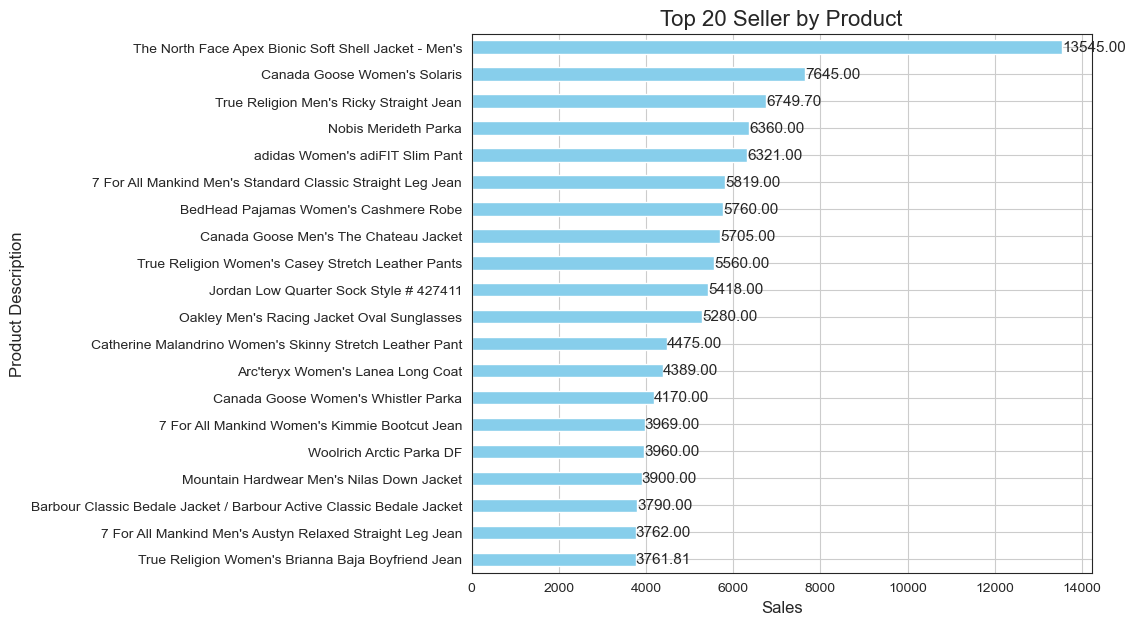

In [66]:
barh_chart(
    df=top_seller_by_prod, 
    barh_color="skyblue", 
    barh_title="Top 20 Seller by Product", 
    barh_xlabel="Sales", 
    barh_ylabel="Product Description")

**Top 5 Products by Sales:**
1. The North Face Apex Bionic Soft Shell Jacket (Men's): 13,545.00
2. Canada Goose Women's Solaris: 7,645.00
3. True Religion Men's Ricky Straight Jean: 6,749.70
4. Nobis Merideth Parka: 6,360.00
5. Adidas Women's adiFIT Slim Pant: 6,321.00

**Key Insights:**<br>

**1. Product Category Breakdown:**
- Outerwear dominates the top sellers (7 jackets/coats)
- Denim products are strongly represented
- Mix of men's and women's fashion items
- Presence of luxury and performance brands

**2. Brand Performance:**
- The North Face leads with highest single product sales
- Canada Goose appears multiple times 
- True Religion shows strong performance in jeans
- Premium outdoor and fashion brands prominent

**3. Price Point Observations:**
- High-end winter wear commands significant sales
- Performance/technical clothing sells well
- Luxury and designer brands maintain strong market position

**4. Sales Strategy Implications:**
- Invest in premium outerwear collections
- Maintain diverse product range across genders
- Focus on brands with strong reputation


**Notable Trends:**
- Winter/outdoor clothing drives high sales
- Designer denim remains consistently popular
- Performance wear attracts significant consumer interest

<br>



**B.3 Sales By Category**

In [67]:
seller_by_category = (
    df_product_sales23.groupby(by="category")["sales"]
    .sum()
    .sort_values(ascending=False)
)

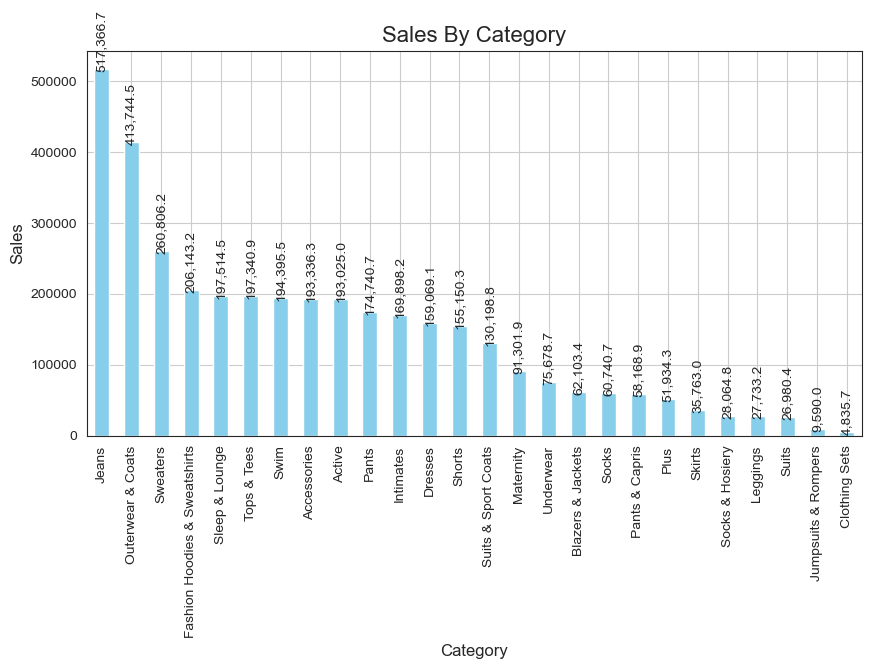

In [68]:
bar_chart(
    df=seller_by_category, 
    bar_color="skyblue", 
    bar_title="Sales By Category", 
    bar_xlabel="Category", 
    bar_ylabel="Sales")

**Top 5 Categories by Sales:**
1. Jeans: 517,366.71
2. Outerwear & Coats: 413,744.55
3. Sweaters: 260,806.24
4. Fashion Hoodies & Sweatshirts: 206,143.20
5. Sleep & Lounge: 197,514.54

**Key Insights:**<br>

**1. Category Performance:**
- Jeans dominate sales, representing the top-performing category
- Strong performance in seasonal and comfort wear
- Significant sales across diverse clothing types

**2. Sales Concentration:**
- Top 5 categories account for about 37% of total category sales
- Clear consumer preference for versatile, everyday clothing
- Substantial variation in sales across categories

**3. Strategic Observations:**
- Apparel basics drive significant revenue
- Seasonal categories like Outerwear show strong sales
- Comfort and loungewear gaining market importance

**4. Sales Distribution:**
- High-volume categories: Jeans, Outerwear, Sweaters
- Mid-range categories: Hoodies, Sleep Wear, Tops
- Lower-performing categories: Suits, Clothing Sets

**Bottom 5 Categories by Sales:**
1. Clothing Sets: 4,835.70
2. Jumpsuits & Rompers: 9,589.99
3. Suits: 26,980.40
4. Leggings: 27,733.25
5. Socks & Hosiery: 28,064.76

**Recommendations:**
- Prioritize inventory and marketing for top-performing categories
- Investigate strategies to boost sales in lower-performing categories
- Maintain diverse product range while focusing on core categories

<br>



**B.4 Sales Per Invoice Total Quantity**

In [69]:
invoice_total_quantity = df_product_sales23.groupby(by="invoice_no")["quantity"].sum().reset_index()
invoice_total_quantity.rename(columns={'quantity': 'inv_quantity'}, inplace=True)
invoice_total_quantity

invoice_no  inv_quantity
0               3             6
1               4             5
2               5             1
3               6             7
4              27             2
...           ...           ...
13110      125178             6
13111      125179             3
13112      125212             6
13113      125222             4
13114      125223             4

[13115 rows x 2 columns]

In [70]:
sales_by_invoice_total_quantity = df_product_sales23.merge(
    invoice_total_quantity, on="invoice_no")[["invoice_no", "inv_quantity", "sales"]]

sales_by_invoice_total_quantity

invoice_no  inv_quantity   sales
0          98298            14   23.80
1          98298            14   44.97
2          98298            14   33.98
3          98298            14  119.90
4          98299            14  399.95
...          ...           ...     ...
18814       3989             7  686.00
18815       3988             2   29.90
18816      13533             2  200.00
18817      90645             5  150.00
18818      48431             1   39.96

[18819 rows x 3 columns]

In [71]:
total_sales_by_invoice_total_quantity= sales_by_invoice_total_quantity.groupby("inv_quantity")["sales"].sum()

In [72]:
bar_chart(
    df=total_sales_by_invoice_total_quantity, 
    bar_color="skyblue", 
    bar_title="Sales Per Invoice Total Quantity", 
    bar_xlabel="Invoice Total Quantity", 
    bar_ylabel="Total Sales")

<br>


<a id='Percent'></a>
**B.5 Percent of Total**

In [73]:
persent_sales_by_invoice_total_quantity= (
    sales_by_invoice_total_quantity.groupby("inv_quantity")["sales"].sum()
    / sales_by_invoice_total_quantity["sales"].sum() * 100
).round(2)

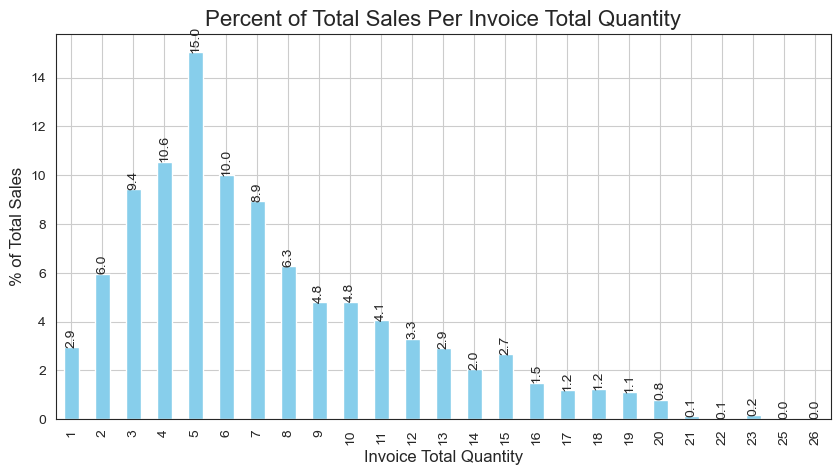

In [74]:
bar_chart(
    df=persent_sales_by_invoice_total_quantity, 
    bar_color="skyblue", 
    bar_title="Percent of Total Sales Per Invoice Total Quantity", 
    bar_xlabel="Invoice Total Quantity", 
    bar_ylabel="% of Total Sales")

**Key Insights:**<br> 

**1. Purchase Behavior:**
- Most profitable invoice range: 3-6 items
- Peak sales occur at 5 items per invoice
- Significant sales drop-off for invoices with 7+ items

**2. Sales Distribution Patterns:**
- Customers prefer moderate-sized purchases
- Sharp decline in sales for single-item and very large invoices
- Sweet spot for sales appears to be 3-6 items per transaction

**3. Strategic Implications:**
- Design promotions targeting 3-6 item purchases
- Create bundle deals to encourage multi-item transactions
- Investigate barriers preventing larger invoice quantities

**Recommendations:**
- Develop marketing strategies to optimize 3-6 item purchases
- Create incentives for customers to increase basket size
- Analyze why larger invoices show reduced sales performance

**Interesting Observations:**
- Single-item purchases still significant at 108,612
- Sudden sales drop after 10 items per invoice
- Potential opportunity to understand and address purchase barriers

<br>


- - ### Analysis of Customer Lifetime Value (CLTV)<br>
Customer Lifetime Value (CLTV) is a metric that measures the total amount of revenue a company can expect from an average customer over the course of their relationship. In this context, we will be using historical data to calculate the actual CLTV for each customer, which in our case represents the cumulative value of all sales made by that individual customer.

<br>

**C.1 CLTV By State**

In [75]:
cltv = df_product_sales23.groupby(by="customer_id")["sales"].sum().reset_index()
cltv.rename(columns={'sales': 'cltv'}, inplace=True)

In [76]:
cltv_state = df_product_sales23.merge(cltv, on="customer_id")[["product_id", "state_ab", "cltv"]]
cltv_state = cltv_state.sort_values("state_ab").reset_index(drop=True)

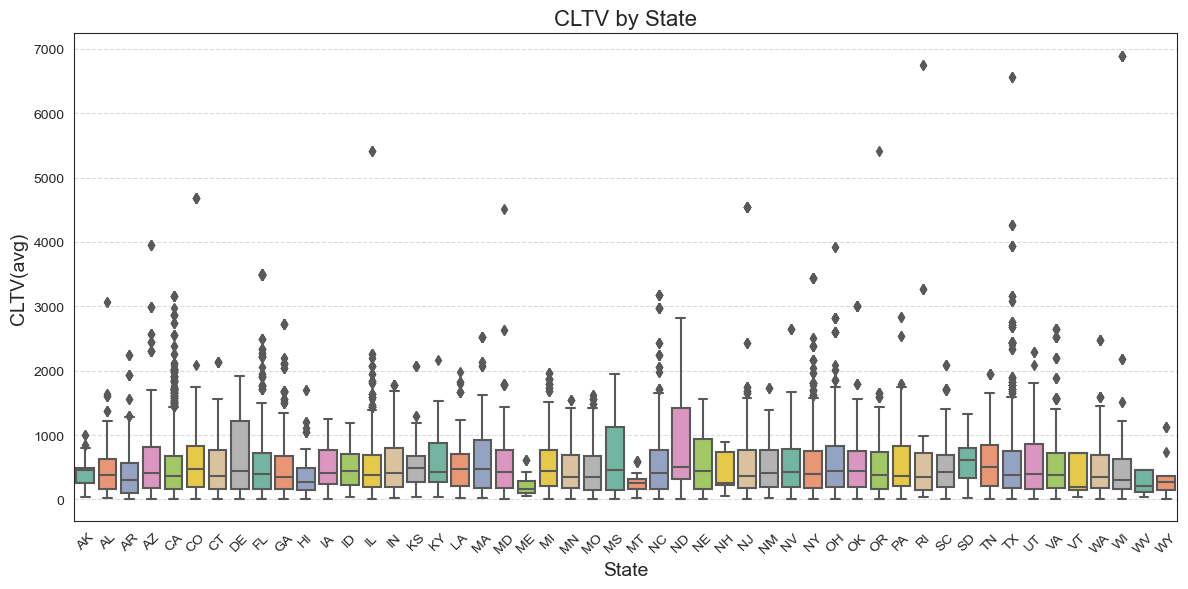

In [77]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=cltv_state, x='state_ab', y='cltv', palette="Set2")

plt.title('CLTV by State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('CLTV(avg)', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout();

### Key Insights:

1. **Variation in Values:**
- Rhode Island (RI) has the highest average CLTV of approximately $992

- North Dakota (ND) comes in second with an average of $877

- Mississippi (MS) comes in third with an average of $723

2. **Outliers:**
- Most states have high outliers
- Outliers are clearly visible as dots above the boxes in the chart
- Some states like RI, NJ, and OH have very high outliers of over $4,000


&#9865; **Based on the analysis, we can see that the distribution of customer lifetime value (CLTV) varies significantly across states. Some states, such as Rhode Island (RI) and North Dakota (ND), have significantly higher averages, indicating the presence of high-value customers. In contrast, other states, such as Oklahoma (OK), have lower values. Outliers are prominent in several states, reflecting the presence of exceptional customers with very high values.**



<br>

<a id='Growth'></a>
- ## Part III.2 - Growth Opportunities

<br>


- - ### Time Series Analysis
<br>

- - - ### Trend of Orders And Revenue Over Time:<br>
Before diving into product data and making data-driven decisions, it’s essential to have a clear picture of the overall performance of our business. Analyzing time series data on revenue and order volume will allow us to identify growth opportunities, improve marketing strategies, and allocate resources more effectively.

<br>

**A.1 I will first look at the number of requests received over time.**

In [78]:
def line_chart(df, line_title, line_xlabel, line_ylabel, ylim_min,  ylim_max_plus):
    ax= pd.DataFrame(df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
    )
    
    ax.set_ylim([ylim_min, max(df.values) + ylim_max_plus])

    plt.xticks(
        range(len(df.keys())),
        [x.strftime("%m.%Y") for x in df.keys()],
        rotation=45
        )

    ax.set_title(line_title, fontsize=16)
    ax.set_xlabel(line_xlabel, fontsize=12)
    ax.set_ylabel(line_ylabel, fontsize=12);

In [79]:
df_monthly_orders = df_product_sales23.set_index("transaction_date")['invoice_no'].resample("M").nunique()
df_monthly_orders.to_csv("df_monthly_orders.csv")

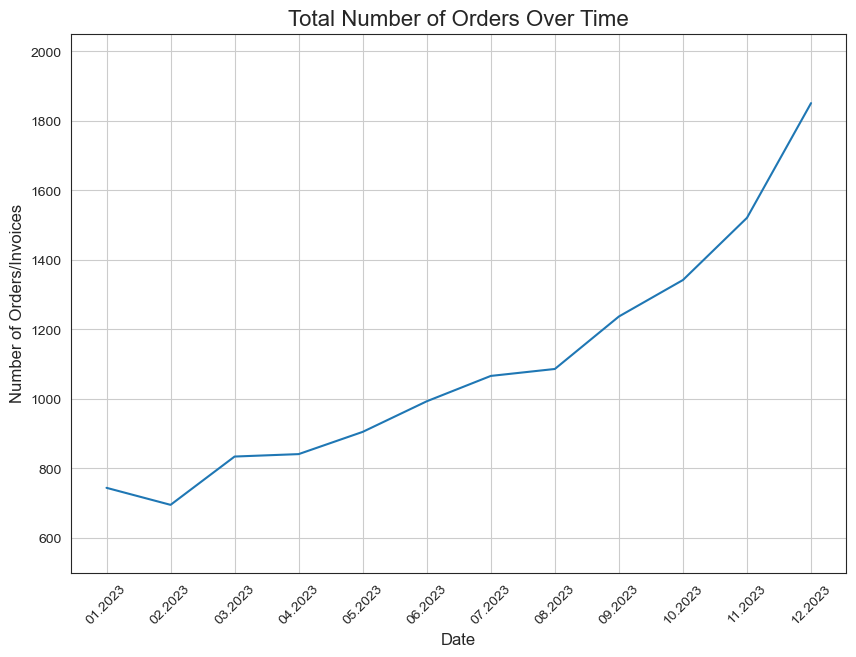

In [80]:
line_chart(
    df_monthly_orders, 
    line_title="Total Number of Orders Over Time", 
    line_xlabel="Date", 
    line_ylabel="Number of Orders/Invoices", 
    ylim_min=500, 
    ylim_max_plus=200)

**Key Insights:**<br>

**1. Growth in orders over time:**
- There is a gradual increase in order volume, reflecting business expansion or increased customer demand. This may be the result of improved products or services, market expansion, or successful marketing strategies.

**2. No apparent seasonality:**
- Demand appears relatively stable with minor changes month over month, indicating that demand is not affected by specific seasons (such as holidays or tourist periods). If seasonality is expected, it may be necessary to check for longer time periods.

**3. Minor changes month over month:**
- Small fluctuations in order volume may be due to hidden seasonal factors, minor changes in demand, or random events (such as small marketing campaigns or changes in customer preferences).

<br>**Recommendations based on these insights:**
- Analyze future trends: Build a predictive model to help you forecast future demand based on the current trend.
- Examine external factors: Check whether there are external events that affect demand, such as market changes or promotional campaigns.
- Increase marketing investment or improve service: Since the trend is upward, this momentum can be leveraged to expand the - business or increase revenue through targeted strategies.

<br>

**A.2 Secondly, I will look at monthly revenue.**

In [81]:
df_monthly_revenue= df_product_sales23.set_index("transaction_date")['sales'].resample("M").sum()

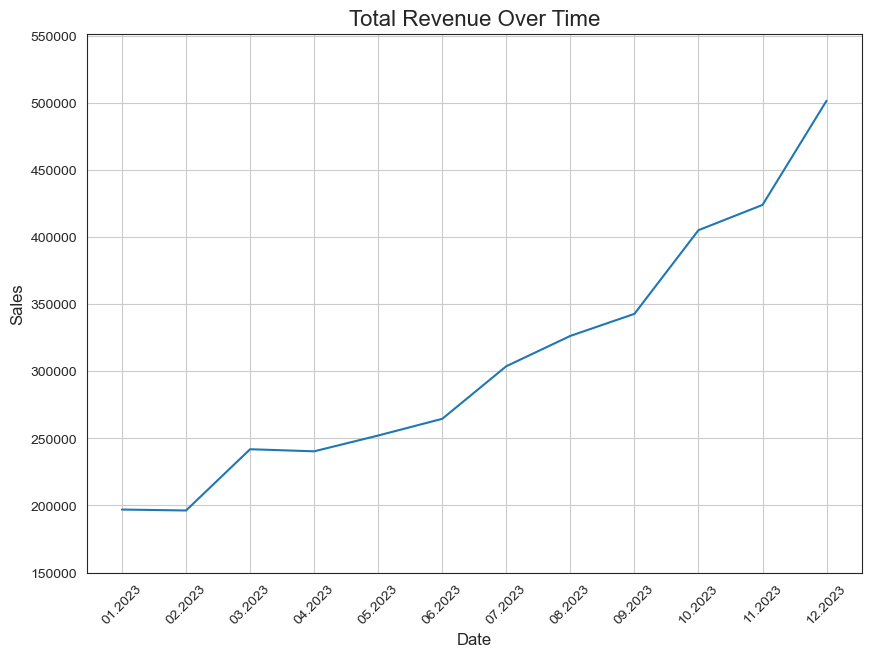

In [82]:
line_chart(
    df_monthly_revenue, 
    line_title="Total Revenue Over Time", 
    line_xlabel="Date", 
    line_ylabel="Sales", 
    ylim_min=150000, 
    ylim_max_plus=50000)

<br>

- - - ### Repeat Customers:<br>
<br>
Repeat customers are the foundation of any successful business. To see how successful we are at retaining our customers, we will count the number of times the same customer makes a purchase in a single month. This number will give us a clear idea of ​​the strength of our relationship with our customers and the health of our business in general.

<br>

**A.3 First, I will look at the number of monthly recurring purchases.**

In [83]:
def dual_line_chart(
    ax1_df1, ax1_df2, ax2_df3, 
    line_title, line_xlabel,
    ax1_line_ylabel, ax2_line_ylabel,
    ax1_ylim_min, ax1_ylim_max, ax1_ylim_max_plus,
    ax1_legend, ax2_legend):
    
    ax= pd.DataFrame(ax1_df1.values).plot(
    figsize=(10,7),
    lw=2
    )
    
    pd.DataFrame(ax1_df2.values).plot(
    ax= ax,
    grid=True,
    lw=2
    )
    
    ax2= pd.DataFrame(ax2_df3.values).plot.bar(
    ax= ax,
    grid=True,
    secondary_y=True,
    color='green',
    alpha=0.3
    )
    
    ax.set_title(line_title, fontsize=16)
    ax.set_xlabel(line_xlabel, fontsize=12)
    ax.set_ylabel(ax1_line_ylabel, fontsize=12)
    ax2.set_ylabel(ax2_line_ylabel, fontsize=12)
    
    ax.legend(ax1_legend, loc='upper left')
    ax2.legend(ax2_legend, loc='upper right')
    
    ax.set_ylim([ax1_ylim_min, max(ax1_ylim_max.values) + ax1_ylim_max_plus])
    ax2.set_ylim([0, 100])

    plt.xticks(
        range(len(ax2_df3.keys())),
        [x.strftime("%m.%Y") for x in ax2_df3.keys()],
        rotation=45
        );

In [84]:
df_invoice_customer = df_product_sales23.groupby(
    by=["invoice_no", 'transaction_date']
).agg({
    'sales':sum,
    'customer_id':max
}).reset_index()

df_invoice_customer

invoice_no          transaction_date   sales  customer_id
0               3 2023-04-23 09:13:00+00:00  359.94            3
1               4 2023-08-08 09:13:00+00:00  543.75            3
2               5 2023-03-10 09:13:00+00:00  109.99            3
3               6 2023-04-02 09:13:00+00:00  425.44            3
4              27 2023-08-29 07:59:00+00:00  106.00           18
...           ...                       ...     ...          ...
13110      125178 2023-10-08 00:03:00+00:00  110.04        99956
13111      125179 2023-10-13 00:03:00+00:00   59.97        99956
13112      125212 2023-09-07 13:08:00+00:00   95.94        99985
13113      125222 2023-01-28 07:27:00+00:00  220.00        99998
13114      125223 2023-07-22 07:27:00+00:00   87.96        99998

[13115 rows x 4 columns]

&#9865; **I grouped the data frame, by invoice_no and transaction_date, and added up all the sales. This way, our new data frame, df_invoice_customer , has one record for each purchase order.**


<br>

**I will then group this data monthly and count the number of customers who made multiple purchases within a given month.**


In [85]:
# Set transaction date as index
df_set_index_date = df_invoice_customer.set_index("transaction_date")

# Segment data by month and customer ID
grouped = df_set_index_date.groupby([pd.Grouper(freq='M'), "customer_id"])

# Filter out customers who have more than one transaction in the same month
repeat_customers = grouped.filter(lambda x: len(x) > 1)

# Resampling data by month and calculating unique number of customers
df_monthly_repeat_customer = repeat_customers.resample("M").nunique()["customer_id"]

<br>

**Then Calculate the total number of monthly customers.**

In [86]:
df_monthly_unique_customers = df_product_sales23.set_index("transaction_date")['customer_id'].resample("M").nunique()

<br>

**Now compare these two groups to calculate the percentages of repeat customers per month.**

In [87]:
df_monthly_repeat_pecent = (df_monthly_repeat_customer / df_monthly_unique_customers) * 100

In [88]:
dual_line_chart(
    ax1_df1=df_monthly_repeat_customer,
    ax1_df2=df_monthly_unique_customers, 
    ax2_df3=df_monthly_repeat_pecent, 
    line_title="Number of All vs. Repeat Customers Over Time", 
    line_xlabel="Date",
    ax1_line_ylabel="Number of Customers", 
    ax2_line_ylabel="Persentage (%)",
    ax1_ylim_min=0,
    ax1_ylim_max=df_monthly_unique_customers,
    ax1_ylim_max_plus=100,
    ax1_legend=["Repeat Customers", "All Customers"], 
    ax2_legend=["Persentage of Repeat"])

### Monthly Customer Overview

#### Key Indicators:
1. **Total Customer Growth**:
- Started the year with 731 customers in January 2023
- Ended with 1,657 customers in December 2023
- Total growth of 126% over the year

2. **Repeating Customers**:
- The number of repeat customers increased from 13 customers in January to 156 customers in December
- Significant growth in repeat customers by 1,100%

3. **Repeating Customer Ratio**:
- Started the year with 1.78% of customers as repeat customers
- Reached 9.41% in December
- Continuous increase in repeat customer ratio

### Monthly Evolution Analysis

#### Gradual Growth:
- January - March: Relatively slow growth
- April - September: Average and steady growth
- October - December: Big Jump in Customers and Recurring Customers

### Key Points

1. **Continuous Improvement in Loyalty**:
- Steady Increase in Recurring Customers
- From 1.78% to 9.41% Indicates Improved Service Quality and Increased Customer Satisfaction

2. **Strong Customer Growth**:
- Total Customers Increased from 731 to 1,657
- Indicates Successful Marketing and Customer Acquisition Strategies

3. **Accelerated Growth in Q4**:
- Big Jump in October, November and December
- Increase in Recurring Customers and Recurring Customers

### Recommendations

1. Study the Factors That Led to the Strong Growth in Q4
2. Continue New Customer Attraction Strategies
3. Focus on Customer Loyalty Programs to Increase Recurring Customers
4. Analyze More Details Such as Recurring Customers’ Purchase Value


<br>

**A.4 Secondly, Calculate how much monthly revenue comes from repeat customers.**

In [89]:
# Resampling data by month and calculating total sales to customers
df_monthly_rev_repeat_customer = repeat_customers.resample("M").sum()["sales"]

In [90]:
df_monthly_rev_repeat_pecent = (df_monthly_rev_repeat_customer / df_monthly_revenue) * 100

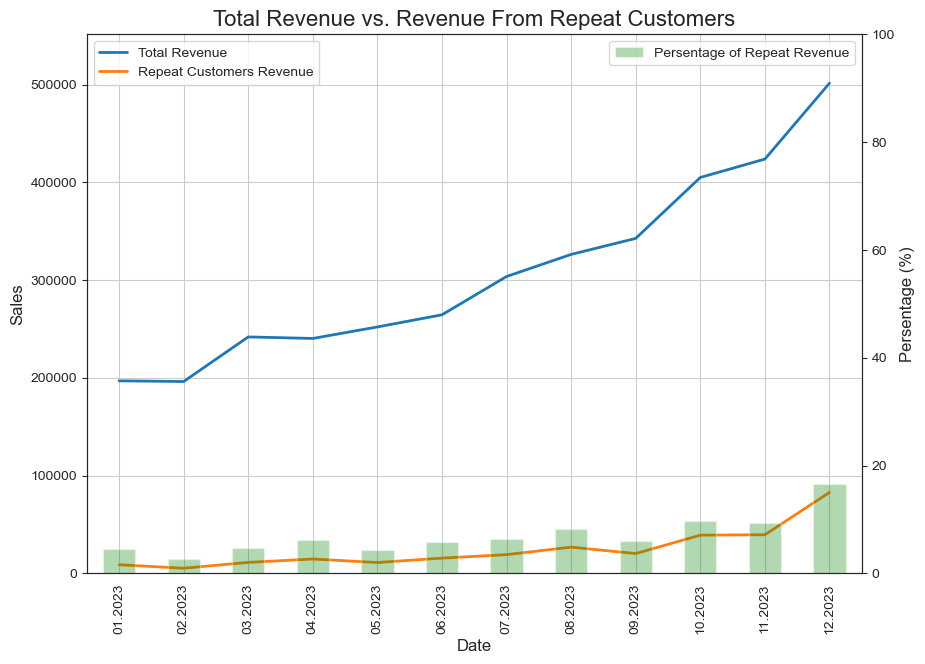

In [91]:
dual_line_chart(
    ax1_df1=df_monthly_revenue,
    ax1_df2=df_monthly_rev_repeat_customer, 
    ax2_df3=df_monthly_rev_repeat_pecent, 
    line_title="Total Revenue vs. Revenue From Repeat Customers", 
    line_xlabel="Date",
    ax1_line_ylabel="Sales", 
    ax2_line_ylabel="Persentage (%)",
    ax1_ylim_min=0,
    ax1_ylim_max=df_monthly_revenue,
    ax1_ylim_max_plus=50000,
    ax1_legend=["Total Revenue", "Repeat Customers Revenue"], 
    ax2_legend=["Persentage of Repeat Revenue"])

### Revenue Overview

#### Key Indicators:
1. **Total Revenue**:
- Started the year with 196,984 in January
- Ended with 501,531 in December
- Year-over-year growth of 155%

2. **Returning Customer Revenue**:
- Started with 8,799 in January
- Reached 82,832 in December
- A massive 841% growth

3. **Revenue Percentage from Repeating Customers**:
- Started with 4.47% in January
- Increased to 16.52% in December
- Continuous increase in repeat customer contribution

### Monthly Growth Analysis

#### Growth Pattern:
- January - March: Modest Growth
- April - September: Consistent and Steady Growth
- October - December: Huge Jump in Revenue

### Key Points For Analysis

1. **The importance of repeat customers**:
- Steady increase in their contribution to revenue
- From 4.47% to 16.52% indicates an improvement in customer retention strategies

2. **Revenue growth**:
- Total revenue growth by 155%
- Recurring customer revenue growth by 841%
- Indicates the effectiveness of customer attraction and retention strategies

3. **The last quarter of the year**:
- A significant jump in revenue
- A significant increase in the share of repeat customers

### Strategic recommendations

1. **Enhancing customer loyalty programs**:
- Investing in repeat customer incentive programs
- Designing special offers for regular customers

2. **Success factor analysis**:
- Studying the reasons for the significant growth in the last quarter
- Understanding the factors that contributed to the increase in repeat customer revenue

3. **Pricing strategy**:
- Reviewing pricing models to encourage loyalty
- Providing incentives for repeat purchases

4. **Improving customer experience**:
- Continuing to improve the quality of products and services
- Building long-term relationships with Customers

### Exploratory Questions
- Which products contribute the most to repeat customer revenue?
- Are there specific customer segments that can be focused on?

**====================================================================================================================**

### Comparing customer and revenue growth patterns

We see a similar pattern to the previous graph (number of customers) and the current graph (revenue), where there has been a significant increase in performance from September to December 2023.

#### Comparative analysis of customers and revenue

1. **Recurring customer ratio**:
- In the previous graph: increased from 1.78% to 9.41%
- In the revenue graph: increased from 4.47% to 16.52%

2. **Importance of repeat customers**:
- Repeat customers make up about 9.41% of total customers
- But they contribute 16.52% of total revenue in December

This illustrates an important point: although repeat customers represent a small percentage of the total customer base, they contribute disproportionately to revenue.

### In-depth Analysis

1. **Relative Value of Repeat Customers**:
- While repeat customers make up around 9-10% of total customers, they contribute around 16-17% of total revenue

2. **Cumulative Growth**:
- Repeat Customer Growth: 1,100%
- Repeat Customer Revenue Growth: 841%

### Key Takeaways

1. Repeat customers are a key revenue driver
2. Each repeat customer generates more value than new customers
3. Investing in customer retention and loyalty can be a highly profitable strategy

### Recommendations

1. Develop targeted loyalty programs
2. Understand repeat customer motivations
3. Offer unique incentives and experiences for repeat customers
4. Focus on improving the value proposition for repeat customers

<br>

- - - ### Trend of Elements Over Time:<br>
<br>
This analysis aims to understand the relationship between our products and our customers’ behavior. We will learn how customers interact with our different product categories. In particular, we will analyze the five most popular categories to see what attracts customers to them.

<br>

**A.5 Calculate the number of items sold per category per period.**

In [92]:
df_date_category = pd.DataFrame(
    df_product_sales23.set_index("transaction_date")
    .groupby([pd.Grouper(freq="M"), "category"])["quantity"].sum().reset_index()
)

<br>

**A.6 Extract the best-selling categories in November 2023.**

In [93]:
df_last_month_sorted = df_date_category[df_date_category["transaction_date"] == "2023-11-30"].sort_values(
    by = ["quantity"], ascending = False).reset_index(drop=True)

df_last_month_sorted.head()

transaction_date     category  quantity
0 2023-11-30 00:00:00+00:00  Accessories       673
1 2023-11-30 00:00:00+00:00    Intimates       638
2 2023-11-30 00:00:00+00:00        Jeans       599
3 2023-11-30 00:00:00+00:00  Tops & Tees       495
4 2023-11-30 00:00:00+00:00       Active       465

<br>

**A.7 Sum monthly sales data for these five categories again.**

In [94]:
df_date_category = pd.DataFrame(
    df_product_sales23.loc[df_product_sales23["category"].isin(df_last_month_sorted["category"].head().to_list())]
    .set_index("transaction_date")
    .groupby([pd.Grouper(freq="M"), "category"])["quantity"].sum()
    .reset_index()
)

df_date_category.head(10)

transaction_date     category  quantity
0 2023-01-31 00:00:00+00:00  Accessories       256
1 2023-01-31 00:00:00+00:00       Active       199
2 2023-01-31 00:00:00+00:00    Intimates       296
3 2023-01-31 00:00:00+00:00        Jeans       278
4 2023-01-31 00:00:00+00:00  Tops & Tees       316
5 2023-02-28 00:00:00+00:00  Accessories       257
6 2023-02-28 00:00:00+00:00       Active       171
7 2023-02-28 00:00:00+00:00    Intimates       261
8 2023-02-28 00:00:00+00:00        Jeans       239
9 2023-02-28 00:00:00+00:00  Tops & Tees       306

<br>

**A.8 Convert this data to a tabular format.**

In [95]:
df_trending_cat = df_date_category.pivot('transaction_date', 'category').fillna(0)
df_trending_cat.columns = df_trending_cat.columns.droplevel(0)

df_trending_cat

category                   Accessories  Active  Intimates  Jeans  Tops & Tees
transaction_date                                                             
2023-01-31 00:00:00+00:00          256     199        296    278          316
2023-02-28 00:00:00+00:00          257     171        261    239          306
2023-03-31 00:00:00+00:00          262     268        274    337          352
2023-04-30 00:00:00+00:00          309     264        277    350          332
2023-05-31 00:00:00+00:00          360     328        350    347          337
2023-06-30 00:00:00+00:00          288     304        432    336          406
2023-07-31 00:00:00+00:00          305     287        422    402          382
2023-08-31 00:00:00+00:00          361     349        458    452          323
2023-09-30 00:00:00+00:00          463     382        482    446          442
2023-10-31 00:00:00+00:00          500     437        457    611          478
2023-11-30 00:00:00+00:00          673     465        638    599          495
2023-12-31 00:00:00+00:00          633     442        670    781          667

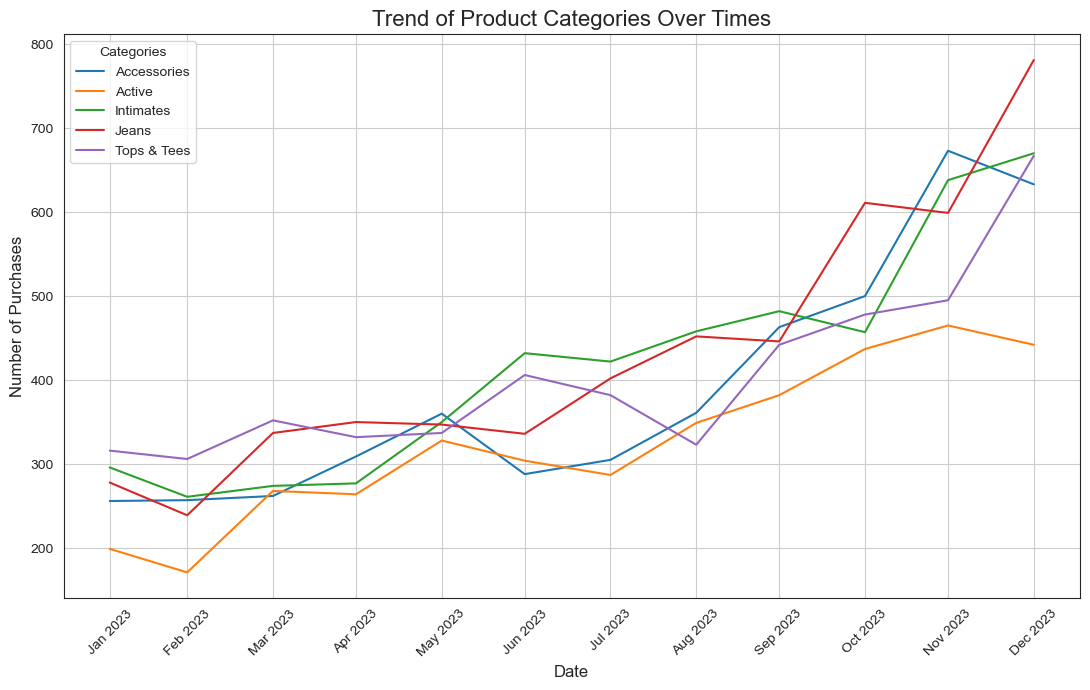

In [96]:
plt.figure(figsize=(11, 7))

for column in df_trending_cat.columns:
    plt.plot(df_trending_cat.index, df_trending_cat[column], label=column)


plt.xticks(
    ticks=df_trending_cat.index,
    labels=df_trending_cat.index.strftime('%b %Y'), 
    rotation=45 
)


plt.title('Trend of Product Categories Over Times', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.legend(title="Categories", fontsize=10)
plt.grid(True)
plt.tight_layout();

**Key Insights:**<br>

**1. General trend:**
- Some categories such as Accessories and Tops & Tees appear to be showing a long-term upward trend, indicating growth in demand or sales.
- Other categories such as Active and Intimates may have a relatively stable trend with limited fluctuations.

**2. Seasonal fluctuations:**
- Some categories appear to have a cyclical recurrence, indicating a particular season when demand increases. For example, Jeans or Active sales may increase at certain times of the year.

**3. Variation between categories:**
- The Tops & Tees category generally has higher values ​​than other categories, indicating that it may be the most popular or in demand.
- The Intimates category tends to move in a more stable range with less extreme fluctuations.

**4. Sudden changes:**
- There are some sharp spikes or dips in some categories, such as Accessories, which may indicate events, special offers, or changes in the market.

**5. Correlation between categories:**
- Some categories appear to be synchronized in trends, which may indicate a common influence such as a particular season or a marketing campaign that affects more than one category.

<br>

**Suggested questions for deeper analysis:**

- Is there a correlation between categories (e.g., a rise in one category leads to a decline in another)?

- Are fluctuations tied to specific seasons (e.g., holidays or back-to-school seasons)?

- How can sales be forecasted for higher-growing categories such as Accessories?


<br>


- - ### Market Basket Analysis

<br>

**B.1 Perform self-join on stored data**

In [97]:
df_self_join = df_product_sales23.merge(df_product_sales23, on='invoice_no', suffixes=('', '_self'))

#This helps remove excess or unwanted buildup.
df_self_join = df_self_join[df_self_join['category'] < df_self_join['category_self']] 

df_self_join.head()

order_item_id invoice_no product_id  \
1        142771      98298      13928   
2        142771      98298      13928   
3        142771      98298      13928   
6        142772      98298       5803   
7        142772      98298       5803   

                                 product_description     category  \
1  Low Profile Dyed Cotton Twill Cap - Putty W39S55D  Accessories   
2  Low Profile Dyed Cotton Twill Cap - Putty W39S55D  Accessories   
3  Low Profile Dyed Cotton Twill Cap - Putty W39S55D  Accessories   
6  LOCOMO Women Patriot Patriotic Great Britain B...     Leggings   
7  LOCOMO Women Patriot Patriotic Great Britain B...     Leggings   

             brand department          transaction_date  cost  \
1               MG      Women 2023-11-19 09:52:00+00:00  2.34   
2               MG      Women 2023-11-19 09:52:00+00:00  2.34   
3               MG      Women 2023-11-19 09:52:00+00:00  2.34   
6  LOCOMO Leggings      Women 2023-11-19 09:52:00+00:00  8.74   
7  LOCOMO Leggings      Women 2023-11-19 09:52:00+00:00  8.74   

   shipping_cost_1000_mile  unit_price  quantity  sales customer_id  age  ...  \
1                     0.19        5.95         4  23.80       78444   39  ...   
2                     0.19        5.95         4  23.80       78444   39  ...   
3                     0.19        5.95         4  23.80       78444   39  ...   
6                     0.81       14.99         3  44.97       78444   39  ...   
7                     0.81       14.99         3  44.97       78444   39  ...   

  unit_price_self quantity_self sales_self customer_id_self age_self  \
1           14.99             3      44.97            78444       39   
2           16.99             2      33.98            78444       39   
3           23.98             5     119.90            78444       39   
6           16.99             2      33.98            78444       39   
7           23.98             5     119.90            78444       39   

  gender_self  postal_code_self  city_self   state_self  state_ab_self  \
1           F             38655     Oxford  Mississippi             MS   
2           F             38655     Oxford  Mississippi             MS   
3           F             38655     Oxford  Mississippi             MS   
6           F             38655     Oxford  Mississippi             MS   
7           F             38655     Oxford  Mississippi             MS   

  region_self customer_latitude_self customer_longitude_self  \
1       South              34.329453              -89.468527   
2       South              34.329453              -89.468527   
3       South              34.329453              -89.468527   
6       South              34.329453              -89.468527   
7       South              34.329453              -89.468527   

  state_latitude_self state_longitude_self  
1           32.741646           -89.678696  
2           32.741646           -89.678696  
3           32.741646           -89.678696  
6           32.741646           -89.678696  
7           32.741646           -89.678696  

[5 rows x 49 columns]

<br>

**B.2 Group by Invoice No, Category, and Category_Self**

In [98]:
#Group data by invoice number, then by category and category_self pairs.
df_agg_pairs = df_self_join.groupby([pd.Grouper("invoice_no"), "category", "category_self"]).agg({
    'quantity': 'sum',
    'quantity_self': 'sum',
}).reset_index()

df_agg_pairs.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\groupby\grouper.py:385: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\groupby\grouper.py:527: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)



invoice_no           category category_self  quantity  quantity_self
0           6              Jeans          Swim         5              2
1          41  Blazers & Jackets     Maternity         2              5
2          41  Blazers & Jackets          Plus         2              5
3          41  Blazers & Jackets   Tops & Tees         2              3
4          41          Maternity          Plus         5              5

<br>

**B.3 Calculate correlation for each category pair across invoices**

In [99]:
col = []

for cat, cat_self in zip(df_agg_pairs['category'], df_agg_pairs['category_self']):
    df_agg_pairs_filter = df_agg_pairs[(df_agg_pairs["category"] == cat) & (df_agg_pairs["category_self"] == cat_self)]
    correlation = df_agg_pairs_filter['quantity'].corr(df_agg_pairs_filter['quantity_self'])
    if pd.isnull(correlation):
        col.append(np.nan)
    else:
        col.append(correlation)

df_agg_pairs["correlation"] = col

df_agg_pairs.sort_values("category_self")

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning:

Degrees of freedom <= 0 for slice

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning:

divide by zero encountered in true_divide



invoice_no     category category_self  quantity  quantity_self  \
4515       82444  Accessories        Active         7              5   
1219       21942  Accessories        Active        24              8   
1744       31067  Accessories        Active         3              4   
4399       80411  Accessories        Active        11              2   
6614      117523  Accessories        Active         8              1   
...          ...          ...           ...       ...            ...   
2066       36598       Active     Underwear         6              5   
5307       95978  Accessories     Underwear         2              2   
6285      111552        Jeans     Underwear         3              4   
6220      110640  Tops & Tees     Underwear        10             18   
5095       92460        Jeans     Underwear         4              4   

      correlation  
4515     0.200069  
1219     0.200069  
1744     0.200069  
4399     0.200069  
6614     0.200069  
...           ...  
2066     0.087579  
5307    -0.053064  
6285     0.223059  
6220     0.457726  
5095     0.223059  

[7017 rows x 6 columns]

<br>

**B.4 Create a correlation matrix for categories**

In [100]:
market_basket_corr = pd.pivot_table(
    df_agg_pairs,
    values='correlation',
    index='category_self', 
    columns='category', 
    aggfunc='max'
)

market_basket_corr.to_csv("market_basket_corr.csv")

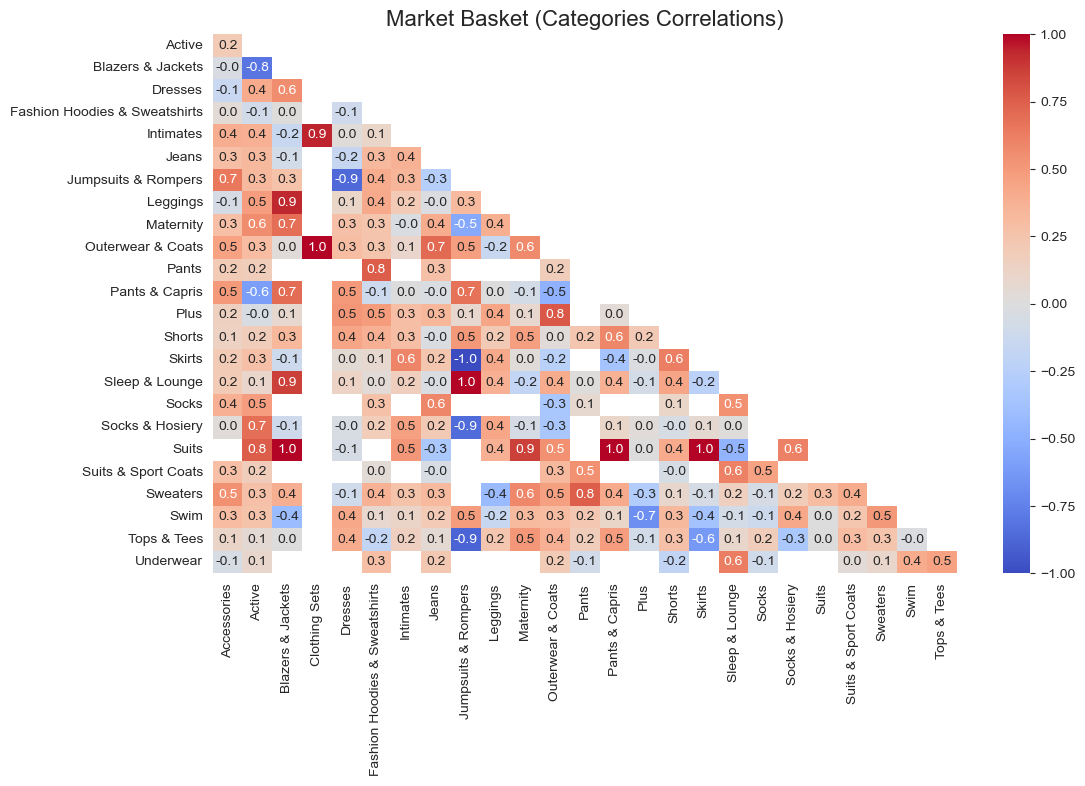

In [101]:
plt.figure(figsize=(12, 7))
sns.heatmap(market_basket_corr, annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Market Basket (Categories Correlations)", fontsize=16)
plt.xlabel("")
plt.ylabel("");

<br>

**Key Insights:**<br>

**1. Strong Positive Correlations:**
- Intimates & Clothing Sets: 0.94 (Nearly perfect correlation)
- Outerwear & Clothing Sets: 1.0 (Extremely strong connection)
- Suits & Plus Categories: 1.0 (Identical purchasing patterns)
- Jumpsuits & Sleep & Lounge: 1.0 (Identical buying behavior)

**2. Interesting Category Relationships:**
- Active Wear shows moderate positive correlation with:
  * Maternity (0.56)
  * Leggings (0.48)
  * Socks & Hosiery (0.69)

- Jeans correlate positively with:
  * Accessories (0.29)
  * Intimates (0.37)
  * Socks (0.59)

**3. Negative Correlations:**
- Blazers & Jackets negatively correlate with Active Wear (-0.81)
- Jumpsuits & Rompers strongly negatively correlate with Dresses (-0.87)
- Skirts show negative correlation with Jumpsuits & Rompers (-1.0)

<br>**Strategic Recommendations:**<br>

**1. Cross-promotion and cross-promotion strategies:**
- Link Intimates with Clothing Sets (correlation 0.94)
- Integrate Outerwear with Clothing Sets
- Design cross-promotions for Suits and Plus
- Create integrated packages for Jumpsuits and Sleep & Lounge

**2. Targeted marketing strategies:**
- Target Active Wear purchases:
  * Focus on the Maternity category
  * Link it with Leggings products
  * Design offers for pregnant athletes

**3. Cross-promotion strategies:**
- Link Jeans with:
  * Accessories
  * Intimates
  * Socks
- Design integrated offers that combine these categories

**4. Avoid negative overlaps:**
- Separate the marketing of Blazers & Jackets from Active Wear
- Avoid simultaneous offers for Jumpsuits and Dresses
- Reduce competition between Skirts and Jumpsuits

<br>

<a id='ShipCost'></a>
- ## Part III.3 - Shipping Costs & Profits<br>
 - **DrapeAura** realizes that its current warehouse location poses a significant challenge to its logistics operations, especially when it comes to shipping to the East Coast. However, the company has decided to sacrifice short-term profit margins in order to achieve a larger goal of reaching a broader customer base. This investment will contribute to the company's long-term growth.
 - Our goal is to help the company balance expansion and increasing profits, by finding solutions to reduce shipping costs and increase profit margin per unit.”

<br>


- - ### Shipping Costs
<br>

- - - ### shipping cost per thousand miles for each product:<br>

**A.1 Calculate the average shipping cost per thousand miles for each product.**

In [102]:
unit_ship_cost = (
    df_product_sales23.groupby(
        by="product_description")["shipping_cost_1000_mile"]
    .mean()
    .sort_values(ascending=False)
    .head(20)
)

In [103]:
ax = unit_ship_cost.sort_values().plot(
    kind="barh",
    color="skyblue",
    grid=True,
    figsize=(8, 7)
)


for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{width:.1f}', (x + width + 0.02, y + height / 2), ha='left', va='center', fontsize=11)


ax.set_title("Shipping Cost Per Product", fontsize=16)
ax.set_xlabel("Sales", fontsize=12)
ax.set_ylabel("Product Description", fontsize=12);

<br>

**Key Insights:**<br>


**1. Shipping Cost Range**:
   - The shipping costs for these products vary significantly, ranging from 21.55 to 49.34 for a 1000-mile shipment.
   - This wide range suggests considerable variability in shipping expenses across different product types and brands.

**2. Brand and Product Observations**:
   - Luxury and outdoor brands like Canada Goose, The North Face, and Nobis dominate the dataset.
   - Clothing items, particularly jackets and outerwear, seem to have higher shipping costs.
   - The most expensive shipping item is a sock-style product (Jordan Low Quarter), which is somewhat unexpected.


<br>

- - - ### Shipping Distance:<br>
<br>
- We will calculate the average shipping distance to customers in each state, compared to our warehouse location in Los Angeles (latitude and longitude: 34.05, -118.25), to help management understand where they are located, and identify states that require greater logistics efforts.

- This information will help management evaluate the efficiency of our current operations and identify areas that may need additional warehouses or logistics partnerships.


<br>

**A.2 Calculate the average shipping distance to customers in each state.**

In [104]:
from geopy.distance import geodesic

# Los Angeles, California Coordinates (Latitude, Longitude) Repository
wearhouse_LAX = (34.05, -118.25)


# Calculate distance in miles
df_product_sales23["distance_LAX_mi"] = df_product_sales23.apply(
    lambda row: geodesic(wearhouse_LAX, (row['customer_latitude'], row['customer_longitude'])).miles,
    axis=1
)

C:\Users\HOME\AppData\Local\Temp\ipykernel_12052\1720011300.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [105]:
distance_avg_ship_by_stat = df_product_sales23.groupby(by='state_ab')['distance_LAX_mi'].mean()

data = {
    'state': distance_avg_ship_by_stat.keys(),
    'distance_LAX': distance_avg_ship_by_stat.values,
    'customers': cust_num_by_stat.values,
    'latitude': df_States_Region_map.sort_values("abbreviation")["latitude"],
    'longitude': df_States_Region_map.sort_values("abbreviation")["longitude"]
}

df_distance_avg_ship_by_stat = pd.DataFrame(data)

df_distance_avg_ship_by_stat['Text'] = (
    df_distance_avg_ship_by_stat['state'].astype(str) + "<br>" +
    df_distance_avg_ship_by_stat['distance_LAX'].round(1).astype(str) + " mi"
)

In [106]:
dist_map(
    df=df_distance_avg_ship_by_stat, 
    Location='state',
    color_scale='blues',
    bar_values='distance_LAX', 
    bar_title='Distance LAX', 
    Title='Shipping Distance From Los Angeles (CA) Wearhouse')

<br>

**Key Insights:**<br>

**1. Distance Distribution:**
- **Closest states to the warehouse:**

 * California (CA): 141.4 miles
 * Nevada (NV): 248.3 miles
 * Utah (UT): 562.7 miles

- **Farthest states from the warehouse:**
 * Maine (ME): 2,654.5 miles
 * Hawaii (HI): 2,550.7 miles
 * Massachusetts (MA): 2,584.3 miles

**2. Important Notes:**
- Customer concentration does not always correlate with warehouse proximity
- Some distant states like New York (2,432.1 miles) and Florida (2,222.0 miles) have a large customer base
- Some relatively close states have few customers, like New Mexico (69 customers)

<br>

- - - ### What-if Analysis:<br>
<br>
   - We are currently facing a challenge in accurately calculating shipping costs at **DrapeAura**, as there is no automated system in place to record these costs. After communicating with the shipping department, we learned that shipping a large quantity of the same product costs approximately 30% less than shipping a single unit. Given the importance of this information in decision making, we will create a new calculation model in our spreadsheets. This model will allow us to calculate shipping costs more accurately, taking into account changes in quantity, which will help management make more effective pricing decisions.
<br>
   - We will create two columns: one to calculate the baseline shipping cost, and the other to calculate the cost reduction factor when shipping large quantities. We will use this tool to analyze the impact of quantity changes on shipping costs, which will help us better understand the relationship between quantity and cost. We will also test different scenarios to determine the optimal price per unit shipped.
<br>

   - Since the order size of 5 units is the most common [(15% of sales)](#Percent), we chose it as the starting point for our analysis. This choice will allow us to extract more statistically significant results, as they will be more representative of our customers in general.


<br>

**A.3 Calculate the shipping baseline cost for customers in each state.**

In [107]:
df_product_sales23['shipping_baseline'] = (
    df_product_sales23['shipping_cost_1000_mile'] + 
    ((df_product_sales23['quantity'] - 1).clip(lower=0) * 
     df_product_sales23['shipping_cost_1000_mile'] * 0.7).round(2)
)

df_product_sales23[["order_item_id", "unit_price", "quantity", "shipping_cost_1000_mile", "shipping_baseline"]]

C:\Users\HOME\AppData\Local\Temp\ipykernel_12052\2988184426.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



order_item_id  unit_price  quantity  shipping_cost_1000_mile  \
0            142771        5.95         4                     0.19   
1            142772       14.99         3                     0.81   
2            142774       16.99         2                     0.82   
3            142776       79.99         5                     3.26   
4            142775       45.99         4                     1.97   
...             ...         ...       ...                      ...   
28372          5756       98.00         7                     2.90   
28373          5755       14.95         2                     0.42   
28377         19552      100.00         2                     3.54   
28378        131673       30.00         5                     1.20   
28379         70438       39.96         1                     1.37   

       shipping_baseline  
0                   0.59  
1                   1.94  
2                   1.39  
3                  12.39  
4                   6.11  
...                  ...  
28372              15.08  
28373               0.71  
28377               6.02  
28378               4.56  
28379               1.37  

[18819 rows x 5 columns]

In [108]:
ship_baseline_by_stat = df_product_sales23.groupby(by='state_ab')['shipping_baseline'].sum()

data = {
    'state': ship_baseline_by_stat.keys(),
    'shipping_cost': ship_baseline_by_stat.values,
    'latitude': df_States_Region_map.sort_values("abbreviation")["latitude"],
    'longitude': df_States_Region_map.sort_values("abbreviation")["longitude"]
}

df_ship_baseline_by_stat = pd.DataFrame(data)


df_ship_baseline_by_stat['Text'] = (
    df_ship_baseline_by_stat['state'].astype(str) + "<br>$" +
    df_ship_baseline_by_stat['shipping_cost'].round(1).astype(str)
)

In [109]:
dist_map(
    df=df_ship_baseline_by_stat, 
    Location='state',
    color_scale='blues',
    bar_values='shipping_cost', 
    bar_title='Shipping Costs', 
    Title='Shipping Costs By State')

<br>

**Key Insights:**<br>

**1. Significant Variation in Shipping Costs:**
- There is a massive difference between the highest and lowest shipping costs (from 27.74 to 16,335.08)
- This indicates substantial variations in shipping expenses across states

**2. Qualitative Observations:**
- Large states like Texas, California, and Florida have the highest shipping costs
- Smaller and mountainous states like Vermont and West Virginia have the lowest costs

<br>

**A.4 Calculate the shipping baseline cost for customers in each .**

In [110]:
def treemap_category(df, df_values, df_color, title, bar_title, mark):
    fig = px.treemap(
    df,
    path=[px.Constant(" "), df.index], 
    values=df_values,
    color=df_color,
    color_continuous_scale='Blues' 
    )
    
    if mark == "$":
        text_template = f'<b>%{{label}}</b><br>%{{value:{mark}.2f}}'
    else:
        text_template = f'<b>%{{label}}</b><br>%{{value:.2f}}{mark}'


    fig.update_traces(
        texttemplate=text_template,
        textposition='middle center'
    )

    fig.update_layout(
        margin=dict(t=50, l=25, r=25, b=25),  
        title_text=title,
        title_font_size=20,
        title_x=0.5,
        coloraxis_colorbar_title_text = bar_title
    )

    fig.show()

In [111]:
ship_baseline_by_category = df_product_sales23.groupby(by='category')['shipping_baseline'].sum()

treemap_category(
    df=ship_baseline_by_category,
    df_values=ship_baseline_by_category.values,
    df_color=ship_baseline_by_category.values,
    title="Shipping Cost By Categories", 
    bar_title="Shipping Cost", mark='$')

<br>

**Key Insights:**<br>

**1. Top 5 Categories by Shipping Cost:**
1. Jeans: 16,223.57
2. Outerwear & Coats: 11,217.76
3. Sweaters: 7,624.30
4. Swim: 6,036.71
5. Tops & Tees: 6,390.31

**2. Bottom 5 Categories by Shipping Cost:**
1. Clothing Sets: 189.32
2. Jumpsuits & Rompers: 310.86
3. Socks & Hosiery: 639.30
4. Skirts: 872.22
5. Leggings: 1,022.76

**4. Insights and Observations:**
- Heavy clothing and jeans have the highest shipping costs
- Small and lightweight clothing has the lowest shipping costs

<br>

**Business Insights:**
- Jeans and heavy outerwear significantly impact shipping expenses
- Lightweight categories like accessories have more manageable shipping costs
- Need for strategic packaging and shipping optimization
- Potential to develop targeted shipping strategies per product category

<br>

**A.5 Calculate the shipping cost blend factor.**

In [112]:
# Create a range of quantities
what_if_quantity = np.arange(1, 21)

# Definition of labels and bins
bins = [0, 1, 2, 4, 7, 9, float('inf')]
labels = [1.0, 0.8, 0.6, 0.5, 0.4, 0.3]

# Calculate shipping cost factors
ship_cost_factor = pd.cut(
    what_if_quantity, bins=bins, labels=labels, right=True
).astype(float)

# Create DataFrame
df_ship_what_if = pd.DataFrame({
    "what_if_quantity": what_if_quantity,
    "ship_cost_factor": ship_cost_factor
})

df_ship_what_if.head()

what_if_quantity  ship_cost_factor
0                 1               1.0
1                 2               0.8
2                 3               0.6
3                 4               0.6
4                 5               0.5

<br>

**A.6 Calculate shipping cost if quantity is 5.**

In [113]:
# Function to calculate shipping cost based on quantity
def shipping_what_if(df_product_sales, target_quantity=1):
    # Verify that the target quantity is within range.
    if target_quantity not in df_ship_what_if["what_if_quantity"].values:
        raise ValueError(f"target_quantity {target_quantity} out of range.")
    
    # Retrieve the shipping cost factor for the target quantity
    ship_cost_factor = df_ship_what_if.loc[
        df_ship_what_if["what_if_quantity"] == target_quantity, "ship_cost_factor"
    ].values[0]
    
    # Calculate shipping cost
    shipping_cost = (
        df_product_sales["shipping_cost_1000_mile"] +
        ((df_product_sales["quantity"] - 1).clip(lower=0) *
         df_product_sales["shipping_cost_1000_mile"] * ship_cost_factor)
    ).round(2)
    
    return shipping_cost

In [114]:
# Applying the function to the quantity 5
shipping_what_if_5 = shipping_what_if(df_product_sales23, target_quantity=5)

# Show results
shipping_what_if_5

0         0.48
1         1.62
2         1.23
3         9.78
4         4.92
         ...  
28372    11.60
28373     0.63
28377     5.31
28378     3.60
28379     1.37
Length: 18819, dtype: float64

<br>

**A.7 Calculate the difference between baseline and blend shipping costs to see how much we can save.**

In [115]:
# Function to the difference shipping costs based on quantity
def ship_diff_baseline(df_product_sales, target_quantity=1):
    
    # Validate target quantity
    if target_quantity not in df_ship_what_if["what_if_quantity"].values:
        raise ValueError(f"target_quantity {target_quantity} out of range.")
    
    # Calculate the calculated shipping cost
    calculated_shipping_cost = shipping_what_if(df_product_sales, target_quantity)
    
    # Calculate the difference
    ship_diff = (df_product_sales["shipping_baseline"] - calculated_shipping_cost).round(2)
    
    return ship_diff

In [116]:
# Applying the function to the quantity 5
shipping_diff_5_baseline = ship_diff_baseline(df_product_sales23, target_quantity=5)

# Show results
shipping_diff_5_baseline

0        0.11
1        0.32
2        0.16
3        2.61
4        1.19
         ... 
28372    3.48
28373    0.08
28377    0.71
28378    0.96
28379    0.00
Length: 18819, dtype: float64

In [117]:
print(
    f"Shipping (Baseline): {df_product_sales23['shipping_baseline'].sum():.2f}\n"
    f"Shipping (What-if Quantity '5'): {shipping_what_if_5.sum():.2f}\n"
    f"Shipping (Difference Baseline): {shipping_diff_5_baseline.sum():.2f}"
)

Shipping (Baseline): 106853.04
Shipping (What-if Quantity '5'): 87961.02
Shipping (Difference Baseline): 18892.02


In [118]:
baseline_quan5_sum = df_product_sales23['shipping_baseline'].sum().round(2)
what_if_quan5_sum = shipping_what_if_5.sum().round(2)
difference_quan5_sum = shipping_diff_5_baseline.sum().round(2)

data = pd.DataFrame({
    "category": ["Shipping (Baseline)", "Shipping (What-if)", "Shipping (Difference)"],
    "ship_cost": [baseline_quan5_sum, what_if_quan5_sum, difference_quan5_sum]
})

plt.figure(figsize=(8, 5))
sns.barplot(data=data, x="category", y="ship_cost", palette=["blue", "green", "red"])

plt.title("Shipping Costs if Quantity 5", fontsize=16)
plt.xlabel("Categories", fontsize=14)
plt.ylabel("Shipping Cost (USD)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for index, value in enumerate(data["ship_cost"]):
     plt.text(index, value - 8000, f"{value:.2f}", color='white',
               fontsize=19, fontweight="bold", ha="center", va='center')

plt.tight_layout();

<br>

**Key Insights:**<br>
    
**1. Cost Optimization Strategy:**
- When shipping quantity increases to 5 units, each additional unit beyond the first is charged at only 50% of the original shipping cost
- This introduces a significant volume-based pricing strategy that incentivizes by shipping in larger quantities

**2. Financial Impact:**
- Total Baseline Shipping Cost: 106,853.04
- Total Shipping Cost at Quantity 5: 87,961.02
- Total Shipping Cost Savings: 18,892.02 (17.7% reduction)

**3. Key Interpretations**:
- Substantial cost efficiency achieved by shipping in larger quantities
- Demonstrates a progressive pricing model that rewards larger order quantities
- Provides a clear financial incentive for customers to increase order sizes

**4. Strategic Recommendations:**
- Develop marketing strategies that encourage bulk purchases
- Design pricing and shipping policies that highlight these cost savings
- Create tiered shipping cost structures to motivate higher volume orders

**5. Potential Business Benefits:**
- Improved cash flow through larger order quantities
- Reduced per-unit shipping expenses
- Potential for increased inventory turnover
- Enhanced customer value proposition by offering shipping cost advantages

<br>

**A.8 Calculate baseline Shipping and What-If Cost by Product.**

In [119]:
def data_what_if(df_product_sales, target_quantity=1):

    if target_quantity not in df_ship_what_if["what_if_quantity"].values:
        raise ValueError(f"target_quantity {target_quantity} out of range.")
    
  
    calculated_shipping_cost = shipping_what_if(df_product_sales, target_quantity)
    
   
    ship_diff = (df_product_sales["shipping_baseline"] - calculated_shipping_cost).round(2)
    
    
    data = pd.DataFrame({
    "transaction_date" : df_product_sales["transaction_date"],
    "product_description" : df_product_sales["product_description"],
    "shipping_baseline" : df_product_sales["shipping_baseline"],
    "shipping_what_if" : calculated_shipping_cost,
    "shipping_diff_baseline" : ship_diff
    })
    
    return data

In [120]:
df_what_if_5 = data_what_if(df_product_sales23, target_quantity=5)

df_what_if_5.head()

transaction_date  \
0 2023-11-19 09:52:00+00:00   
1 2023-11-19 09:52:00+00:00   
2 2023-11-19 09:52:00+00:00   
3 2023-11-30 09:52:00+00:00   
4 2023-11-30 09:52:00+00:00   

                                 product_description  shipping_baseline  \
0  Low Profile Dyed Cotton Twill Cap - Putty W39S55D               0.59   
1  LOCOMO Women Patriot Patriotic Great Britain B...               1.94   
2              Floral Flannel Pajamas - Misses Sizes               1.39   
3  Speedo Women's Color Block Zip Front Endurance...              12.39   
4  Glamorise Women's Soft Shoulders Minimizer Bra...               6.11   

   shipping_what_if  shipping_diff_baseline  
0              0.48                    0.11  
1              1.62                    0.32  
2              1.23                    0.16  
3              9.78                    2.61  
4              4.92                    1.19

In [121]:
ship_base_line_by_prod = (
    df_what_if_5.groupby(by="product_description")["shipping_baseline"]
    .sum().reset_index()
)

ship_what_if_5_by_prod = (
    df_what_if_5.groupby(by="product_description")["shipping_what_if"]
    .sum().reset_index()
)

    
ship_cost_5_by_prod = ship_base_line_by_prod.merge(ship_what_if_5_by_prod, on="product_description")

ship_cost_5_by_prod = ship_cost_5_by_prod.sort_values(["shipping_baseline", "shipping_what_if"], ascending=False).head(20)


In [122]:
fig, ax = plt.subplots(figsize=(8, 7))

sns.barplot(
    data=ship_cost_5_by_prod, x="shipping_baseline", y="product_description", color="gray", linewidth=7.5, ax=ax
)

sns.scatterplot(
    data=ship_cost_5_by_prod, x="shipping_what_if", y="product_description", color="blue", s=150, ax=ax
)

ax.set_title("Baseline Shipping and What-If Cost By Product", fontsize=16)

# Add top axis
ax_top = ax.secondary_xaxis('top')  # Add a secondary axis at the top
ax_top.set_xlabel("Shipping What-if 5 Quantity", fontsize=12) 

# Set the upper axis range to match the range of shipping_what_if values.
ax_top.set_xlim(ax.get_xlim())  # Match the range to the lower axis.
ax.set_xlabel("Shipping Baseline 5 Quantity", fontsize=12)

ax.set_ylabel("Product", fontsize=12)


ax.tick_params(axis='x', labelsize=10)  
ax.tick_params(axis='y', labelsize=10)  

# Adding Barplot Values
for p in ax.patches:
    width = p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.annotate(f'{width:.2f}', (width, y), ha='left', va='center', fontsize=11.5, color='#696969')

# Adding Scatterplot Values
for i, row in enumerate(ship_cost_5_by_prod.itertuples()):
    scatter_x = row.shipping_what_if  
    scatter_y = i 
    ax.annotate(
        f'{scatter_x:.2f}',
        (scatter_x - 35, scatter_y),
        ha='left', va='center', fontsize=11.5, color='blue'
    )


formatter = ticker.FormatStrFormatter('$%.2f')
ax.xaxis.set_major_formatter(formatter)
ax_top.xaxis.set_major_formatter(formatter)

ax.grid(True, which="both", linestyle="--", linewidth=0.5);

<br>

**Key Insights:**<br>

**1. Top 5 Products by baseline Shipping Cost:**
1. The North Face Apex Bionic Soft Shell Jacket (Men's): 342.15
2. BedHead Pajamas Women's Cashmere Robe: 258.46
3. Nobis Merideth Parka: 223.34
4. Jordan Low Quarter Sock: 222.03
5. True Religion Men's Ricky Straight Jean: 220.45

**2. Biggest Shipping Cost Savings:**
- Jordan Low Quarter Sock: Save 49.34
- Nobis Merideth Parka: Save 34.35
- The North Face Apex Bionic Soft Shell Jacket (Men's): Save 55.91

**3. Key Interpretations:**
- Heavy and bulky items have the greatest savings
- Shipping strategies in larger quantities provide tangible cost savings

<br>

**A.9 Calculate trend of baseline Shipping and What-If Cost by Product Over Time.**

In [123]:
#trend of baseline Shipping
df_monthly_ship_baseline = df_what_if_5.set_index("transaction_date")['shipping_baseline'].resample("M").sum().cumsum()

df_monthly_ship_baseline

transaction_date
2023-01-31 00:00:00+00:00      5725.70
2023-02-28 00:00:00+00:00     11438.69
2023-03-31 00:00:00+00:00     18530.29
2023-04-30 00:00:00+00:00     25496.65
2023-05-31 00:00:00+00:00     32828.38
2023-06-30 00:00:00+00:00     40522.29
2023-07-31 00:00:00+00:00     49295.25
2023-08-31 00:00:00+00:00     58673.16
2023-09-30 00:00:00+00:00     68611.93
2023-10-31 00:00:00+00:00     80124.11
2023-11-30 00:00:00+00:00     92352.76
2023-12-31 00:00:00+00:00    106853.04
Freq: M, Name: shipping_baseline, dtype: float64

In [124]:
#trend of What-If 
df_monthly_what_if_5 = df_what_if_5.set_index("transaction_date")['shipping_what_if'].resample("M").sum().cumsum()

df_monthly_what_if_5

transaction_date
2023-01-31 00:00:00+00:00     4725.85
2023-02-28 00:00:00+00:00     9429.38
2023-03-31 00:00:00+00:00    15248.56
2023-04-30 00:00:00+00:00    20960.12
2023-05-31 00:00:00+00:00    27000.53
2023-06-30 00:00:00+00:00    33353.50
2023-07-31 00:00:00+00:00    40583.48
2023-08-31 00:00:00+00:00    48298.62
2023-09-30 00:00:00+00:00    56505.64
2023-10-31 00:00:00+00:00    65963.78
2023-11-30 00:00:00+00:00    76011.68
2023-12-31 00:00:00+00:00    87961.02
Freq: M, Name: shipping_what_if, dtype: float64

In [125]:
#trend of Shipping Cost Savings
df_monthly_diff_if_5 = df_what_if_5.set_index("transaction_date")['shipping_diff_baseline'].resample("M").sum().cumsum()

df_monthly_diff_if_5

transaction_date
2023-01-31 00:00:00+00:00      999.85
2023-02-28 00:00:00+00:00     2009.31
2023-03-31 00:00:00+00:00     3281.73
2023-04-30 00:00:00+00:00     4536.53
2023-05-31 00:00:00+00:00     5827.85
2023-06-30 00:00:00+00:00     7168.79
2023-07-31 00:00:00+00:00     8711.77
2023-08-31 00:00:00+00:00    10374.54
2023-09-30 00:00:00+00:00    12106.29
2023-10-31 00:00:00+00:00    14160.33
2023-11-30 00:00:00+00:00    16341.08
2023-12-31 00:00:00+00:00    18892.02
Freq: M, Name: shipping_diff_baseline, dtype: float64

In [126]:
df_ship_merge = df_monthly_ship_baseline.reset_index().merge(
    df_monthly_what_if_5.reset_index(), on="transaction_date").merge(
    df_monthly_diff_if_5.reset_index(), on="transaction_date").set_index("transaction_date")

In [127]:
plt.figure(figsize=(11, 7))

# Custom colors for each column
colors = list(mcolors.TABLEAU_COLORS.values())  # Use default table colors
colors = colors[:len(df_ship_merge.columns)]  # Crop the number of colors to match the number of columns.

# Draw plot for each category.
for column, color in zip(df_ship_merge.columns[::-1], colors):
    plt.fill_between(
        df_ship_merge.index,  
        df_ship_merge[column], 
        color=color, 
        alpha=0.5,  
        label=column   
    )
    # Draw a line to highlight values.
    plt.plot(
        df_ship_merge.index, 
        df_ship_merge[column], 
        color=color, 
        linewidth=2
    )

# Add values at each point.
for column, color in zip(df_ship_merge.columns[::-1], colors):
    for i, value in enumerate(df_ship_merge[column]):
        plt.text(
            x=df_ship_merge.index[i], 
            y=value, 
            s=f'{value:.2f}', 
            fontsize=8, 
            ha='center', 
            va='bottom', 
            color="black",
            alpha=0.9
        )


plt.xticks(
    ticks=df_ship_merge.index,
    labels=df_ship_merge.index.strftime('%b %Y'),
    rotation=45
)

line = df_ship_merge.shipping_diff_baseline.max()

x_position = pd.Timestamp("2023-07-31 00:00:00+0000")

plt.axhline(line, color="xkcd:brick red", lw=1.5)


plt.text(
    x_position, 
    line + 2000, 
    f"Shipping Saving: ${line:.2f}", 
    fontsize=14, 
    fontweight="bold", 
    fontstyle="italic"
)


plt.title('How Quantity Affects Shipping Costs', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.legend(title="Shipping Cost", fontsize=10, loc='upper left')
plt.grid(True, alpha=0.4)
plt.tight_layout();


### key insights:

1. **Cumulative Shipping Metrics Progression:**
- The graph tracks the running total of:
  * Shipping Baseline
  * Shipping What-If (at quantity 5)
  * Shipping Difference Baseline

2. **Trend Characteristics:**
- All three metrics show steady, linear growth throughout the year
- Consistent gap between baseline and what-if shipping costs
- The difference (savings) increases proportionally each month

3. **Financial Insights:**
- Starting cumulative point in January: 
  * Shipping Baseline: 5,725.70
  * Shipping What-If: 4,725.85
  * Shipping Difference: 999.85

- Ending cumulative point in December:
  * Shipping Baseline: 106,853.04
  * Shipping What-If: 87,961.02
  * Shipping Difference: 18,892.02

4. **Key Observations:**
- Predictable and consistent cost reduction strategy
- Cumulative savings grow linearly with business volume
- Demonstrates the scalability of the quantity-based shipping cost optimization

5. **Strategic Implications:**
- The shipping cost reduction strategy is reliable and repeatable
- Provides a clear financial advantage as business scales
- Offers predictable cost management approach

<br>

- - ### Beasline Profit

<br>

**B.1 Calculate the cost of goods(COGS) for each quantity.**

In [128]:
df_product_sales23["cogs"] = df_product_sales23["cost"] * df_product_sales23["quantity"]


C:\Users\HOME\AppData\Local\Temp\ipykernel_12052\1529280552.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<br>

**B.2 Calculate the baseline profit.**

In [129]:
df_product_sales23["profit_baseline"] = (
    df_product_sales23["sales"] - 
    df_product_sales23["cogs"] - 
    df_product_sales23["shipping_baseline"]
)

df_product_sales23[["cogs", "profit_baseline"]]

C:\Users\HOME\AppData\Local\Temp\ipykernel_12052\2986845964.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



cogs  profit_baseline
0        9.36            13.85
1       26.22            16.81
2       20.16            12.43
3      175.20           212.36
4       91.24            86.61
...       ...              ...
28372  370.44           300.48
28373   16.20            12.99
28377   92.20           101.78
28378   82.65            62.79
28379   20.90            17.69

[18819 rows x 2 columns]

<br>

**B.3 Calculate the beasline profit percentage from sales for each state.**

In [130]:
def profit_percent_by_category(df, col_grouping):
    profit_percent_grouping = df.groupby(by=col_grouping).agg({"profit_baseline":sum, "sales":sum})
    profit_percent_grouping["profit_percent"] = (profit_percent_grouping["profit_baseline"] / 
                                             profit_percent_grouping["sales"] * 100).round(2)
    return profit_percent_grouping

In [131]:
df_profit_percent_by_state = profit_percent_by_category(df_product_sales23, "state_ab")

In [132]:
data = {
    'state': cust_num_by_stat.keys(),
    'profit_%': df_profit_percent_by_state["profit_percent"].values,
    'latitude': df_States_Region_map.sort_values("abbreviation")["latitude"],
    'longitude': df_States_Region_map.sort_values("abbreviation")["longitude"]
}

df_profit_percent_by_state = pd.DataFrame(data)

df_profit_percent_by_state['Text'] = (
    df_profit_percent_by_state['state'].astype(str) + "<br>" +
    df_profit_percent_by_state['profit_%'].round(2).astype(str) + "%"
)

In [133]:
dist_map(
    df=df_profit_percent_by_state, 
    Location='state',
    color_scale='blues',
    bar_values='profit_%', 
    bar_title='Profits %', 
    Title='Baseline Profits % By State')

### Key Insights:

1. **Overall Profit Percentage Statistics:**
- Average Profit Percentage: 48.59%
- Highest Profit Percentage: Rhode Island (52.33%)
- Lowest Profit Percentage: Vermont (44.83%)

2. **Top 5 States by Profit Percentage:**
- Rhode Island: 52.33%
- Nebraska: 52.11%
- Delaware: 50.44%
- North Dakota: 50.44%
- Kansas: 50.02%

3. **Bottom 5 States by Profit Percentage:**
- Vermont: 44.83%
- New Hampshire: 46.70%
- Oregon: 46.28%
- Iowa: 47.12%
- Missouri: 47.40%


4. **Analysis of Profit Percentages by State:**
- Most states cluster around 48-49% profit percentage
- Significant variation exists between highest and lowest performers
- No extreme outliers in profit percentages

5. **Financial Performance Observations:**
- Highest Total Sales: California (561,067.33)
- Highest Total Profit: California (272,781.82)
- Lowest Total Sales: Vermont (1,105.86)
- Lowest Total Profit: Vermont (495.73)

6. **Strategic Recommendations:**
- Investigate factors contributing to higher profit percentages in top-performing states
- Analyze operational efficiencies in lower-performing states
- Consider targeted strategies to improve profit margins in states below 47%

<br>

**B.4 Calculate the beasline profit percentage from sales for each category.**

In [134]:
df_profit_percent_by_category = profit_percent_by_category(
    df_product_sales23, "category").sort_values(
    "profit_percent", ascending=False)

treemap_category(
    df=df_profit_percent_by_category,
    df_values='profit_percent',
    df_color='profit_percent',
    title="Profit % by Categories", 
    bar_title="Profit %", mark='%')

### Key Insights:

1. **Top 5 Categories by Profit Percentage:**
- Blazers & Jackets: 59.68%
- Skirts: 57.83%
- Socks & Hosiery: 57.62%
- Accessories: 57.43%
- Suits & Sport Coats: 57.31%

2. **Bottom 5 Categories by Profit Percentage:**
- Clothing Sets: 33.36%
- Suits: 35.70%
- Leggings: 36.22%
- Socks: 36.31%
- Tops & Tees: 40.83%

3. **Key Statistical Insights:**
- Average Profit Percentage: 48.59%
- Profit Percentage Range: 33.36% - 59.68%
- Median Profit Percentage: 48.94%

4. **Financial Performance:**
- Highest Total Sales: Jeans (517,366.71)
- Highest Total Profit: Outerwear & Coats (218,966.13)
- Lowest Total Sales: Clothing Sets (4,835.70)
- Lowest Total Profit: Clothing Sets (1,613.24)

5. **Strategic Observations:**
- High-margin categories tend to be structured/tailored items
- Low-margin categories are often basic or casual wear
- Significant variation in profitability across product lines

6. **Recommendations:**
- Focus marketing and inventory on high-margin categories
- Review pricing and cost structures for low-margin categories
- Investigate opportunities to improve profitability in underperforming product lines

<br>

<a id='KPIs'></a>
# Part IIII - Key Performance Indicators (KPIs)



In [135]:
def kpi(kpi_names, kpi_values):
    
    plt.figure(figsize=(14, 4))
    
    plt.axis('off')  # Hide axes

    # Distribute names and values horizontally
    for i, (name, value) in enumerate(zip(kpi_names, kpi_values)):
        x_position = (i + 1) / (len(kpi_names) + 2)  # Horizontal positioning evenly
        plt.text(
            x=x_position, 
            y=0.7,  # Top text location (name)
            s=name, 
            ha='center', 
            fontsize=20,
            fontweight='bold',
            color='gray'
        )
        plt.text(
            x=x_position, 
            y=0.6,  # Bottom text location (value)
            s=value, 
            ha='center', 
            fontsize=20,
            fontweight='bold',
            color='black'
        )
        
    plt.tight_layout();

<br>

**A.1 KPIs for Executive Summary**

In [136]:
profit_percent = df_product_sales23["profit_baseline"].sum() / df_product_sales23["sales"].sum()

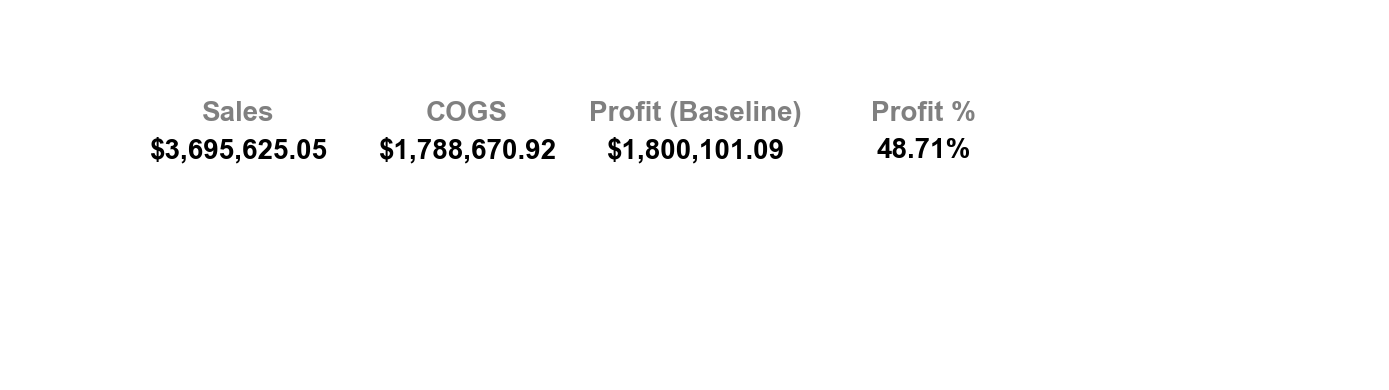

In [137]:
# Data preparation
kpi_names_executive_summary = ['Sales', 'COGS', 'Profit (Baseline)', 'Profit %']
kpi_values_executive_summary = [
    f"${df_product_sales23['sales'].sum():,.2f}",
    f"${df_product_sales23['cogs'].sum():,.2f}", 
    f"${df_product_sales23['profit_baseline'].sum():,.2f}", 
    f"{profit_percent * 100:,.2f}%"
]


kpi(kpi_names_executive_summary, kpi_values_executive_summary)

<br>

**A.1 KPIs for Shipping Costs**

In [138]:
# Data preparation
kpi_names_shipping_costs = ['Shipping (Baseline)', 'Shipping (What-if)', 'Shipping (Saving)']
kpi_values_shipping_costs = [
    f"${df_what_if_5['shipping_baseline'].sum():,.2f}",
    f"${df_what_if_5['shipping_what_if'].sum():,.2f}",
    f"${df_what_if_5['shipping_diff_baseline'].sum():,.2f}"
]


kpi(kpi_names_shipping_costs, kpi_values_shipping_costs)

<a id='Concl'></a>
## Conclusions & Insights

<br>

### Executive Summary:

1. **Product Diversity and Key Sales Drivers:**
   - The company offers a wide range of products, including men\u2019s clothing, accessories, and sportswear. Men\u2019s fashion, particularly jeans and formal pants, dominates sales, with notable demand for premium brands like 7 For All Mankind and Nike.
 

2. **Category Demand Patterns:**
   - Jeans, intimates, and tops are the top-performing categories, collectively accounting for approximately 46% of total quantities sold. These categories highlight a strong consumer preference for essential and comfortable clothing, while lower-performing categories such as formal wear present opportunities for development.<br>
  

3. **Regional Sales Performance:**
   - California, Texas, and Florida are the top-performing states, emphasizing the importance of targeting these markets with focused marketing campaigns. Conversely, underperforming states offer potential for deeper analysis and strategies to improve penetration.
  

4. **Proposed Marketing Strategies:**
   - Focus on strengthening core categories like jeans and seasonal wear by leveraging partnerships with popular brands. Introduce promotional offers to boost sales in low-performing categories, such as formal wear and niche collections, to diversify revenue streams.
   
=======================================================================================================================

### Growth Opportunities:

<br>

#### Growth Opportunities (Product Trends & Customers Retention):

1. **Steady Growth in Orders and Revenue:**
   - The business shows consistent growth in order volume and revenue, with no significant seasonality observed. This upward trend suggests increased customer demand and successful marketing strategies. The absence of pronounced fluctuations indicates stable demand across the year.

- **Recommendation:**
  - Utilize predictive models to forecast future demand and allocate resources effectively. Strengthen marketing campaigns to sustain and accelerate growth.

2. **Repeat Customer Impact:**
   - Repeat customers, while representing only 9.41% of the customer base by December, contribute 16.52% of the total revenue. Their revenue growth outpaces their population growth, underscoring their higher lifetime value.

- **Recommendation:**
  - Develop loyalty programs to incentivize repeat purchases, provide exclusive offers for regular customers, and analyze purchasing patterns to optimize engagement.

3. **Seasonal and Product Trends:**
   - Categories like Accessories and Tops & Tees show long-term upward trends, while others such as Jeans exhibit seasonal fluctuations. Accessories also experienced sudden spikes, possibly influenced by promotions or market shifts.

- **Recommendation:**
  - Focus on forecasting demand for high-growth categories and align marketing efforts with seasonal peaks. Investigate factors driving sudden changes to replicate success across other categories.

4. **Q4 Performance Surge:**
   - Significant growth in customer acquisition and repeat purchases during the last quarter highlights the success of targeted strategies. This period also saw the highest revenue contribution from repeat customers.

- **Recommendation:**
  - Analyze Q4 success factors in detail, such as promotional campaigns or product launches, to replicate these strategies in other periods.

<br>

#### Growth Opportunities (Market Basket & Cross-Sales):

- **Recommendations:**

  1. **Leverage Positive Correlations for Bundling & Promotions:**
     - Bundle Clothing Sets with Intimates or Outerwear.
     - Design combined offers for Suits and Plus categories.
     - Market integrated packages featuring Jumpsuits and Sleep & Lounge.
     
     <br>

  2. **Capitalize on Active Wear Demand:**
     - Create campaigns focused on Maternity and Leggings categories to target pregnant athletes.
     - Pair Active Wear with Socks & Hosiery for athletic bundles.
     
     <br>

  3. **Enhance Jeans-Based Cross-Sales:**
     - Promote Jeans alongside Accessories, Intimates, and Socks through multi-item discounts or style guides.
     
     <br>

  4. **Mitigate Negative Category Interactions:**
     - Avoid promoting Blazers & Jackets with Active Wear.
     - Separate Jumpsuits from Dresses in campaigns to avoid category competition.
     - Refrain from marketing Skirts and Jumpsuits together to maintain distinct category focus.
 
=======================================================================================================================

### Shipping Costs and Profits:

<br>

#### Shipping Costs and Distances:

1. **Shipping Cost Variation:**
- Product shipping costs range from \\$21.55 to \\$49.34 for a 1,000-mile shipment. This significant variation indicates notable differences in shipping costs based on product type and brand.

2. **Quantity and Shipping Analysis:**
- Shipping large quantities of the same product leads to a 30% cost reduction compared to shipping a single unit. 
- When increasing the quantity to 5 units, the shipping cost for each additional unit is reduced by 50% of the original cost, saving the company approximately \\$18,892.02, representing a 17.7% reduction.

3. **Highest Cost Products:**
- Heavy and bulky products such as jackets and pants represent the highest shipping costs. However, shipping these products in larger quantities achieves the greatest cost savings.

4. **Distance Impact:**
- States closer to the Los Angeles warehouse (such as California and Nevada) enjoy lower shipping costs, while distant states like Maine and Hawaii experience higher costs. However, some distant states like New York and Florida have a large customer base, making them strategically important.

<br>

#### Profitability Analysis:

1. **Product Category Profitability:**
- There's a noticeable difference in profit margins across product categories. 
- Identifying high-margin and low-margin categories can inform strategic decisions about inventory management and pricing.

2. **Geographic Profitability:** 
- While California generates the highest total profit, Rhode Island has the highest profit margin. 
- Understanding the factors contributing to these differences can help optimize regional strategies.

3. **Shipping Cost Impact on Profitability:** 
- High shipping costs for certain product categories can erode profit margins. 
- Implementing strategies to reduce these costs, such as optimizing packaging or negotiating better shipping rates, can significantly improve profitability.

=======================================================================================================================

<br>


### View the project's visualization summary on Tableau:

- https://public.tableau.com/app/profile/mohammed.elshennawy/viz/DrapeAura2023E-CommerceAnalysis/ProjectStory